<a href="https://colab.research.google.com/github/knkarthik01/reinforcement-learning/blob/master/c3_mdp_bellman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🗺️ Chapter 3: Finite Markov Decision Processes
# Building Intelligent Navigation and Decision-Making Systems

"""
Welcome to the world of sequential decision making! 🌟

By the end of this notebook, you'll have:
- Built intelligent navigation agents for grid worlds
- Understood states, actions, and the Markov property
- Implemented value functions and optimal policies
- Created a treasure hunting game with MDPs
- Mastered the Bellman equation through code

Let's explore the mathematical foundation of RL! 🧭
"""


In [1]:
# ================================
# 🔧 Setup and Imports
# ================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, FancyBboxPatch, Circle, Arrow
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pandas as pd
from collections import defaultdict
import random
from IPython.display import clear_output, HTML, display
import time
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Enhanced plotting setup
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("🎮 CHAPTER 3: FINITE MARKOV DECISION PROCESSES")
print("=" * 55)
print("📚 LEARNING OBJECTIVES:")
print("   • Understand the MDP framework")
print("   • Master the Markov property")
print("   • Build and solve grid world environments")
print("   • Implement value iteration algorithm")
print("   • Visualize optimal policies and value functions")
print()
print("🔧 Environment Ready! Let's start our MDP journey...")

🎮 CHAPTER 3: FINITE MARKOV DECISION PROCESSES
📚 LEARNING OBJECTIVES:
   • Understand the MDP framework
   • Master the Markov property
   • Build and solve grid world environments
   • Implement value iteration algorithm
   • Visualize optimal policies and value functions

🔧 Environment Ready! Let's start our MDP journey...



🎯 EVOLUTION: From Bandits to MDPs


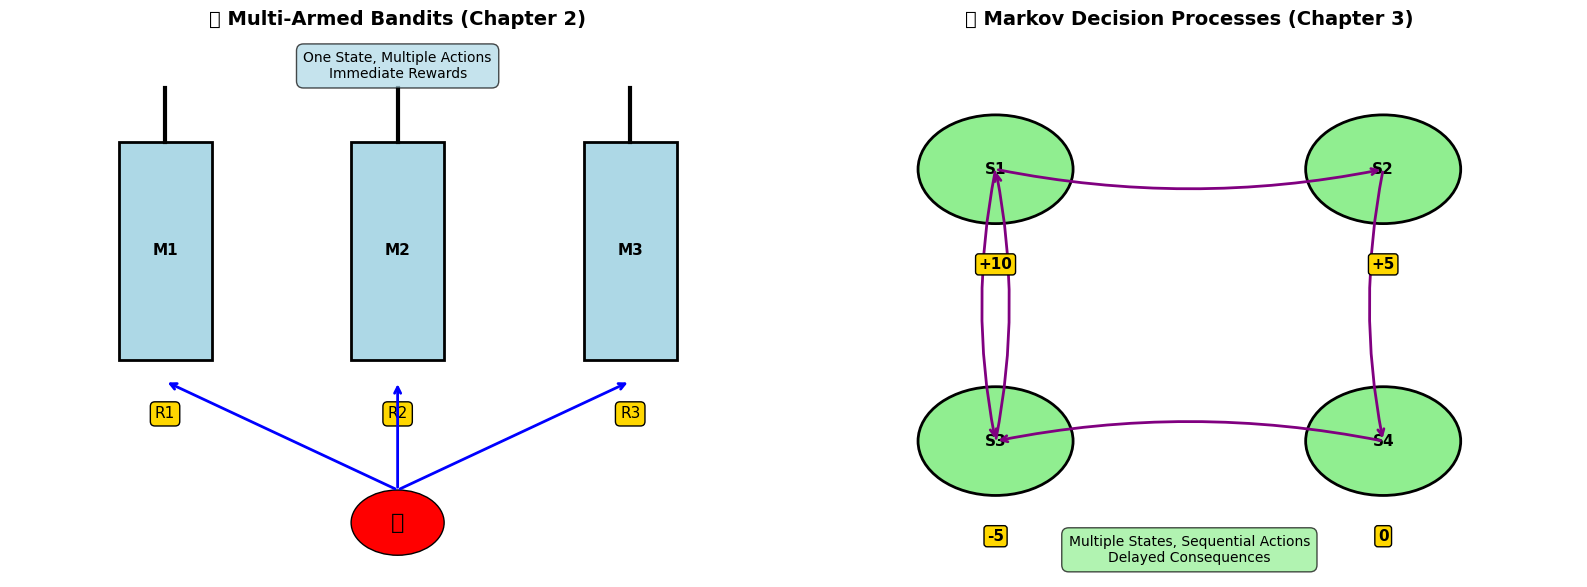

📊 KEY DIFFERENCES:
      Aspect      Bandits            MDPs
 State Space Single state Multiple states
Time Horizon     One-shot      Sequential
     Rewards    Immediate  Can be delayed
      Memory  None needed   Current state
  Complexity          Low          Higher


In [2]:
# ================================
# 🎯 Part 1: From Bandits to MDPs - Visual Comparison
# ================================

print("\n🎯 EVOLUTION: From Bandits to MDPs")
print("=" * 45)

def create_comparison_diagram():
    """Create visual comparison between Bandits and MDPs"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bandit diagram
    ax1.set_title('🎰 Multi-Armed Bandits (Chapter 2)', fontsize=14, fontweight='bold')

    # Draw slot machines
    for i, x in enumerate([1, 2.5, 4]):
        # Machine body
        rect = Rectangle((x-0.3, 2), 0.6, 2, facecolor='lightblue',
                        edgecolor='black', linewidth=2)
        ax1.add_patch(rect)
        ax1.text(x, 3, f'M{i+1}', ha='center', va='center', fontweight='bold')

        # Arm
        ax1.plot([x, x], [4, 4.5], 'k-', linewidth=3)

        # Reward
        ax1.text(x, 1.5, f'R{i+1}', ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='gold'))

    # Agent
    agent_circle = Circle((2.5, 0.5), 0.3, facecolor='red', edgecolor='black')
    ax1.add_patch(agent_circle)
    ax1.text(2.5, 0.5, '🤖', ha='center', va='center', fontsize=16)

    # Action arrows
    for x in [1, 2.5, 4]:
        ax1.annotate('', xy=(x, 1.8), xytext=(2.5, 0.8),
                    arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

    ax1.set_xlim(0, 5)
    ax1.set_ylim(0, 5)
    ax1.axis('off')
    ax1.text(2.5, 4.7, 'One State, Multiple Actions\nImmediate Rewards',
             ha='center', va='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.7))

    # MDP diagram
    ax2.set_title('🗺️ Markov Decision Processes (Chapter 3)', fontsize=14, fontweight='bold')

    # Draw states as circles
    states = [(1, 3), (3, 3), (1, 1), (3, 1)]
    state_labels = ['S1', 'S2', 'S3', 'S4']

    for (x, y), label in zip(states, state_labels):
        circle = Circle((x, y), 0.4, facecolor='lightgreen', edgecolor='black', linewidth=2)
        ax2.add_patch(circle)
        ax2.text(x, y, label, ha='center', va='center', fontweight='bold')

    # Draw transitions
    transitions = [
        ((1, 3), (3, 3), 'right'),
        ((3, 3), (3, 1), 'down'),
        ((3, 1), (1, 1), 'left'),
        ((1, 1), (1, 3), 'up'),
        ((1, 3), (1, 1), 'down'),
        ((3, 3), (1, 1), 'diag')
    ]

    for start, end, direction in transitions:
        if direction != 'diag':
            ax2.annotate('', xy=end, xytext=start,
                        arrowprops=dict(arrowstyle='->', lw=2, color='purple',
                                      connectionstyle="arc3,rad=0.1"))

    # Add rewards
    rewards = ['+10', '+5', '-5', '0']
    for (x, y), reward in zip(states, rewards):
        ax2.text(x, y-0.7, reward, ha='center', va='center', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='gold'))

    ax2.set_xlim(0, 4)
    ax2.set_ylim(0, 4)
    ax2.axis('off')
    ax2.text(2, 0.2, 'Multiple States, Sequential Actions\nDelayed Consequences',
             ha='center', va='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgreen', alpha=0.7))

    plt.tight_layout()
    return fig

comparison_fig = create_comparison_diagram()
plt.show()

print("📊 KEY DIFFERENCES:")
print("=" * 20)

differences_data = {
    'Aspect': ['State Space', 'Time Horizon', 'Rewards', 'Memory', 'Complexity'],
    'Bandits': ['Single state', 'One-shot', 'Immediate', 'None needed', 'Low'],
    'MDPs': ['Multiple states', 'Sequential', 'Can be delayed', 'Current state', 'Higher']
}

df_comparison = pd.DataFrame(differences_data)
print(df_comparison.to_string(index=False))



🏰 BUILDING OUR ENHANCED TREASURE HUNT WORLD
🎮 INITIALIZING ENHANCED TREASURE HUNT...

📊 WORLD STATE INFORMATION:


State,Type,Reward,Terminal,Description
"(0,0)",⬜ Empty,-0.1,No,Regular space
"(0,1)",⬜ Empty,-0.1,No,Regular space
"(0,2)",⬜ Empty,-0.1,No,Regular space
"(0,3)",⬜ Empty,-0.1,No,Regular space
"(0,4)",⬜ Empty,-0.1,No,Regular space
"(1,0)",⬜ Empty,-0.1,No,Regular space
"(1,1)",⚠️ Trap,-10,No,☠️ Deadly Trap
"(1,2)",💰 Treasure,3,No,💍 Jewelry
"(1,3)",🧱 Obstacle,N/A,N/A,Regular space
"(1,4)",⬜ Empty,-0.1,No,Regular space



🗺️ TREASURE HUNT WORLD OVERVIEW:


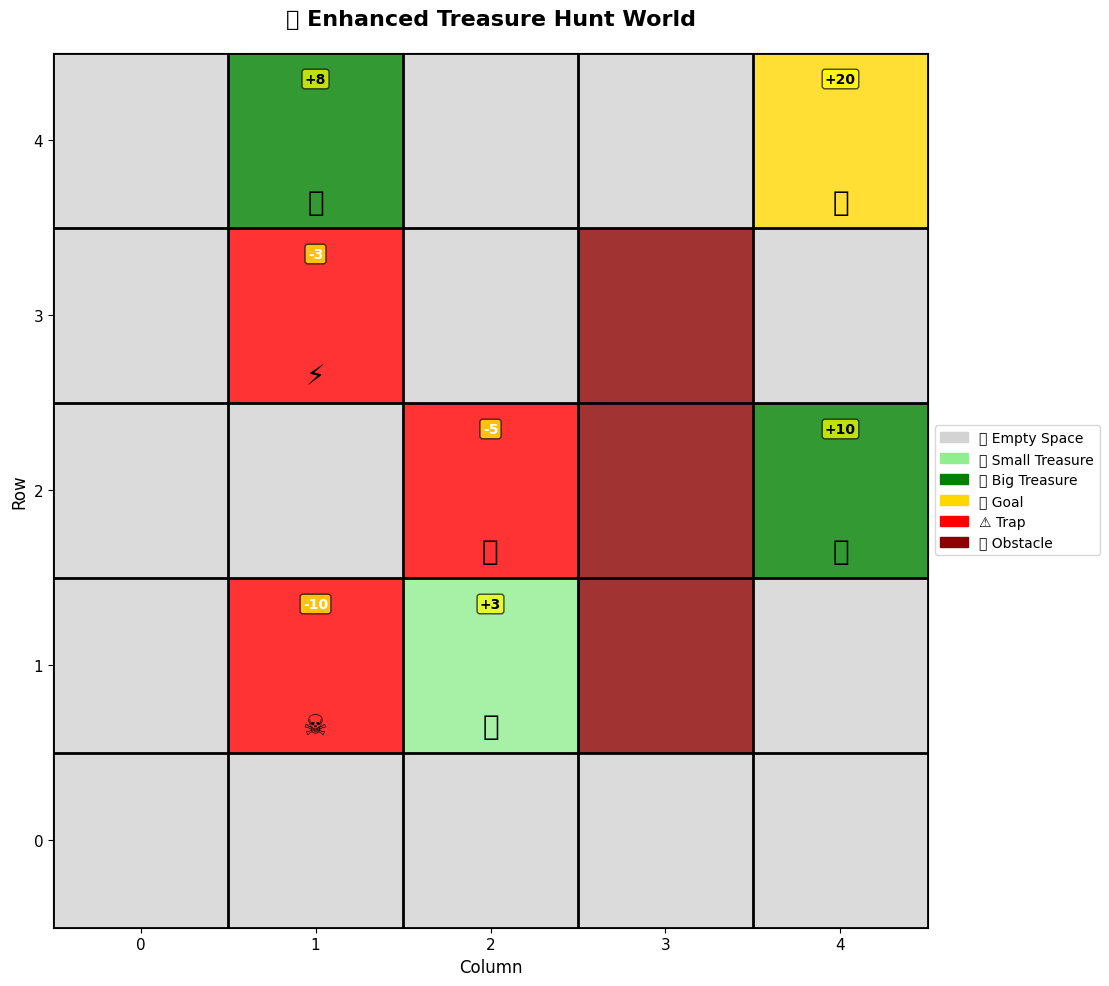


🎯 GAME MECHANICS:
🎮 OBJECTIVE: Reach the big treasure (4,4) with maximum reward!
💎 REWARDS:
   • Big Treasure (4,4): +20 points (TERMINAL)
   • Medium Treasures: +8 to +10 points
   • Small Treasures: +3 points
   • Traps: -3 to -10 points
   • Each step: -0.1 points (efficiency bonus)
🧱 OBSTACLES: Black squares block movement
🏁 START: Bottom-left corner (0,0)


In [3]:
# ================================
# 🏰 Part 2: Building Our Enhanced Grid World MDP
# ================================

print("\n🏰 BUILDING OUR ENHANCED TREASURE HUNT WORLD")
print("=" * 50)

class EnhancedGridWorld:
    """
    An enhanced grid world MDP with rich visualizations and analytics

    This class demonstrates all core MDP concepts:
    - States: Grid positions (row, col)
    - Actions: {up, down, left, right}
    - Transitions: Deterministic movement
    - Rewards: Treasures (+), traps (-), step costs
    - Terminal states: Game-ending positions
    """

    def __init__(self, height=5, width=5, seed=42):
        self.height = height
        self.width = width
        np.random.seed(seed)
        self.reset()

        # Enhanced reward structure
        self.rewards = {}
        self.terminals = set()
        self.obstacles = set()
        self.special_states = {}  # Store state descriptions

        self.setup_enhanced_world()

    def setup_enhanced_world(self):
        """Create an enhanced treasure hunting scenario"""
        # Big treasure (terminal goal)
        self.rewards[(4, 4)] = +20
        self.terminals.add((4, 4))
        self.special_states[(4, 4)] = "💎 Big Treasure"

        # Medium treasures
        self.rewards[(2, 4)] = +10
        self.special_states[(2, 4)] = "🏆 Medium Treasure"

        self.rewards[(4, 1)] = +8
        self.special_states[(4, 1)] = "💰 Gold Coins"

        # Small treasures
        self.rewards[(1, 2)] = +3
        self.special_states[(1, 2)] = "💍 Jewelry"

        # Dangerous traps
        self.rewards[(1, 1)] = -10
        self.special_states[(1, 1)] = "☠️ Deadly Trap"

        self.rewards[(2, 2)] = -5
        self.special_states[(2, 2)] = "🕳️ Pit"

        self.rewards[(3, 1)] = -3
        self.special_states[(3, 1)] = "⚡ Electric Fence"

        # Obstacles (walls)
        self.obstacles.update([(1, 3), (2, 3), (3, 3)])

        # Default step cost (encourages efficiency)
        self.default_reward = -0.1

        # Create transition probabilities (deterministic for now)
        self.transition_probs = self._build_transition_model()

    def _build_transition_model(self):
        """Build complete transition probability model P(s'|s,a)"""
        model = {}
        for state in self.get_all_states():
            model[state] = {}
            for action in ['up', 'down', 'left', 'right']:
                next_state = self.get_next_state(state, action)
                model[state][action] = {next_state: 1.0}  # Deterministic
        return model

    def reset(self):
        """Reset to starting position"""
        self.state = (0, 0)  # Start at bottom-left
        self.done = False
        self.step_count = 0
        return self.state

    def get_possible_actions(self, state=None):
        """Get list of possible actions from current state"""
        if state is None:
            state = self.state

        actions = []
        row, col = state

        # Check each direction
        if row > 0:  # Can go up
            actions.append('up')
        if row < self.height - 1:  # Can go down
            actions.append('down')
        if col > 0:  # Can go left
            actions.append('left')
        if col < self.width - 1:  # Can go right
            actions.append('right')

        return actions

    def get_next_state(self, state, action):
        """Get next state given current state and action"""
        row, col = state

        if action == 'up':
            new_state = (row - 1, col)
        elif action == 'down':
            new_state = (row + 1, col)
        elif action == 'left':
            new_state = (row, col - 1)
        elif action == 'right':
            new_state = (row, col + 1)
        else:
            new_state = state  # Invalid action

        # Check bounds and obstacles
        new_row, new_col = new_state
        if (new_row < 0 or new_row >= self.height or
            new_col < 0 or new_col >= self.width or
            new_state in self.obstacles):
            return state  # Stay in place if invalid move

        return new_state

    def step(self, action):
        """Take an action and return (next_state, reward, done, info)"""
        if self.done:
            return self.state, 0, True, {}

        old_state = self.state
        next_state = self.get_next_state(self.state, action)

        # Get reward
        reward = self.rewards.get(next_state, self.default_reward)

        # Check if terminal
        done = next_state in self.terminals

        # Update state
        self.state = next_state
        self.done = done
        self.step_count += 1

        info = {
            'action': action,
            'old_state': old_state,
            'reward_breakdown': self._get_reward_breakdown(next_state)
        }

        return next_state, reward, done, info

    def _get_reward_breakdown(self, state):
        """Provide detailed reward information"""
        if state in self.rewards:
            return f"Special reward: {self.rewards[state]}"
        else:
            return f"Step cost: {self.default_reward}"

    def get_all_states(self):
        """Get all possible states"""
        states = []
        for row in range(self.height):
            for col in range(self.width):
                if (row, col) not in self.obstacles:
                    states.append((row, col))
        return states

    def create_state_info_table(self):
        """Create informative table of all states"""
        data = []
        for row in range(self.height):
            for col in range(self.width):
                state = (row, col)
                if state in self.obstacles:
                    state_type = "🧱 Obstacle"
                    reward = "N/A"
                    terminal = "N/A"
                elif state in self.terminals:
                    state_type = "🏁 Terminal"
                    reward = self.rewards.get(state, 0)
                    terminal = "Yes"
                elif state in self.rewards:
                    if self.rewards[state] > 0:
                        state_type = "💰 Treasure"
                    else:
                        state_type = "⚠️ Trap"
                    reward = self.rewards[state]
                    terminal = "No"
                else:
                    state_type = "⬜ Empty"
                    reward = self.default_reward
                    terminal = "No"

                description = self.special_states.get(state, "Regular space")

                data.append({
                    'State': f"({row},{col})",
                    'Type': state_type,
                    'Reward': reward,
                    'Terminal': terminal,
                    'Description': description
                })

        return pd.DataFrame(data)

    def visualize(self, policy=None, values=None, path=None, action_values=None,
                  title="Grid World", show_arrows=True, show_values=True):
        """Enhanced visualization with multiple display options"""
        fig, ax = plt.subplots(1, 1, figsize=(12, 10))

        # Create enhanced color mapping
        grid = np.zeros((self.height, self.width))

        for row in range(self.height):
            for col in range(self.width):
                state = (row, col)
                if state in self.obstacles:
                    grid[row, col] = -2  # Dark for obstacles
                elif state in self.terminals:
                    grid[row, col] = 3   # Gold for terminals
                elif state in self.rewards:
                    if self.rewards[state] > 5:
                        grid[row, col] = 2   # Bright green for big rewards
                    elif self.rewards[state] > 0:
                        grid[row, col] = 1   # Light green for small rewards
                    else:
                        grid[row, col] = -1  # Red for traps
                else:
                    grid[row, col] = 0   # White for normal states

        # Enhanced colormap
        colors = ['darkred', 'red', 'lightgray', 'lightgreen', 'green', 'gold']
        cmap = ListedColormap(colors)

        # Plot the grid with enhanced visuals
        im = ax.imshow(grid, cmap=cmap, vmin=-2, vmax=3, alpha=0.8)

        # Add elegant grid lines
        for i in range(self.height + 1):
            ax.axhline(i - 0.5, color='black', linewidth=2)
        for j in range(self.width + 1):
            ax.axvline(j - 0.5, color='black', linewidth=2)

        # Add detailed annotations
        for row in range(self.height):
            for col in range(self.width):
                state = (row, col)

                # Special state emojis
                if state in self.special_states:
                    emoji = self.special_states[state].split()[0]
                    ax.text(col, row - 0.35, emoji, ha='center', va='center',
                           fontsize=20)

                # Reward values with better formatting
                if state in self.rewards and show_values:
                    reward = self.rewards[state]
                    color = 'white' if reward < 0 else 'black'
                    ax.text(col, row + 0.35, f"{reward:+.0f}",
                           ha='center', va='center', fontsize=10,
                           fontweight='bold', color=color,
                           bbox=dict(boxstyle="round,pad=0.2",
                                   facecolor='yellow', alpha=0.7))

                # State values if provided
                if values is not None and state in values and show_values:
                    value = values[state]
                    ax.text(col - 0.35, row - 0.1, f"V={value:.2f}",
                           ha='center', va='center', fontsize=8,
                           color='blue', fontweight='bold',
                           bbox=dict(boxstyle="round,pad=0.1",
                                   facecolor='lightblue', alpha=0.8))

                # Policy arrows with enhanced styling
                if policy is not None and state in policy and show_arrows:
                    action = policy[state]
                    if action:
                        arrows = {'up': '⬆️', 'down': '⬇️', 'left': '⬅️', 'right': '➡️'}
                        ax.text(col + 0.35, row + 0.1, arrows.get(action, '❓'),
                               ha='center', va='center', fontsize=16)

        # Add path with enhanced styling
        if path is not None and len(path) > 1:
            for i in range(len(path) - 1):
                start = path[i]
                end = path[i + 1]
                ax.annotate('', xy=(end[1], end[0]), xytext=(start[1], start[0]),
                           arrowprops=dict(arrowstyle='->', color='purple',
                                         lw=4, alpha=0.8))

            # Mark start and end
            start_state = path[0]
            end_state = path[-1]
            ax.add_patch(Circle((start_state[1], start_state[0]), 0.2,
                               facecolor='blue', alpha=0.8))
            ax.add_patch(Circle((end_state[1], end_state[0]), 0.2,
                               facecolor='red', alpha=0.8))

        # Enhanced title and labels
        ax.set_title(f'🗺️ {title}', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlim(-0.5, self.width - 0.5)
        ax.set_ylim(-0.5, self.height - 0.5)
        ax.set_xticks(range(self.width))
        ax.set_yticks(range(self.height))
        ax.set_xlabel('Column', fontsize=12)
        ax.set_ylabel('Row', fontsize=12)

        # Enhanced legend
        legend_elements = [
            mpatches.Patch(color='lightgray', label='⬜ Empty Space'),
            mpatches.Patch(color='lightgreen', label='💰 Small Treasure'),
            mpatches.Patch(color='green', label='🏆 Big Treasure'),
            mpatches.Patch(color='gold', label='🏁 Goal'),
            mpatches.Patch(color='red', label='⚠️ Trap'),
            mpatches.Patch(color='darkred', label='🧱 Obstacle')
        ]

        ax.legend(handles=legend_elements, loc='center left',
                 bbox_to_anchor=(1, 0.5), fontsize=10)

        plt.tight_layout()
        return fig

# Create our enhanced environment
print("🎮 INITIALIZING ENHANCED TREASURE HUNT...")
env = EnhancedGridWorld(height=5, width=5)

# Display state information table
print("\n📊 WORLD STATE INFORMATION:")
state_info = env.create_state_info_table()
display(HTML(state_info.to_html(index=False, escape=False)))

# Visualize the world
print("\n🗺️ TREASURE HUNT WORLD OVERVIEW:")
fig = env.visualize(title="Enhanced Treasure Hunt World")
plt.show()

print("\n🎯 GAME MECHANICS:")
print("=" * 20)
print("🎮 OBJECTIVE: Reach the big treasure (4,4) with maximum reward!")
print("💎 REWARDS:")
print("   • Big Treasure (4,4): +20 points (TERMINAL)")
print("   • Medium Treasures: +8 to +10 points")
print("   • Small Treasures: +3 points")
print("   • Traps: -3 to -10 points")
print("   • Each step: -0.1 points (efficiency bonus)")
print("🧱 OBSTACLES: Black squares block movement")
print("🏁 START: Bottom-left corner (0,0)")


🎯 THE MARKOV PROPERTY: Visual Understanding


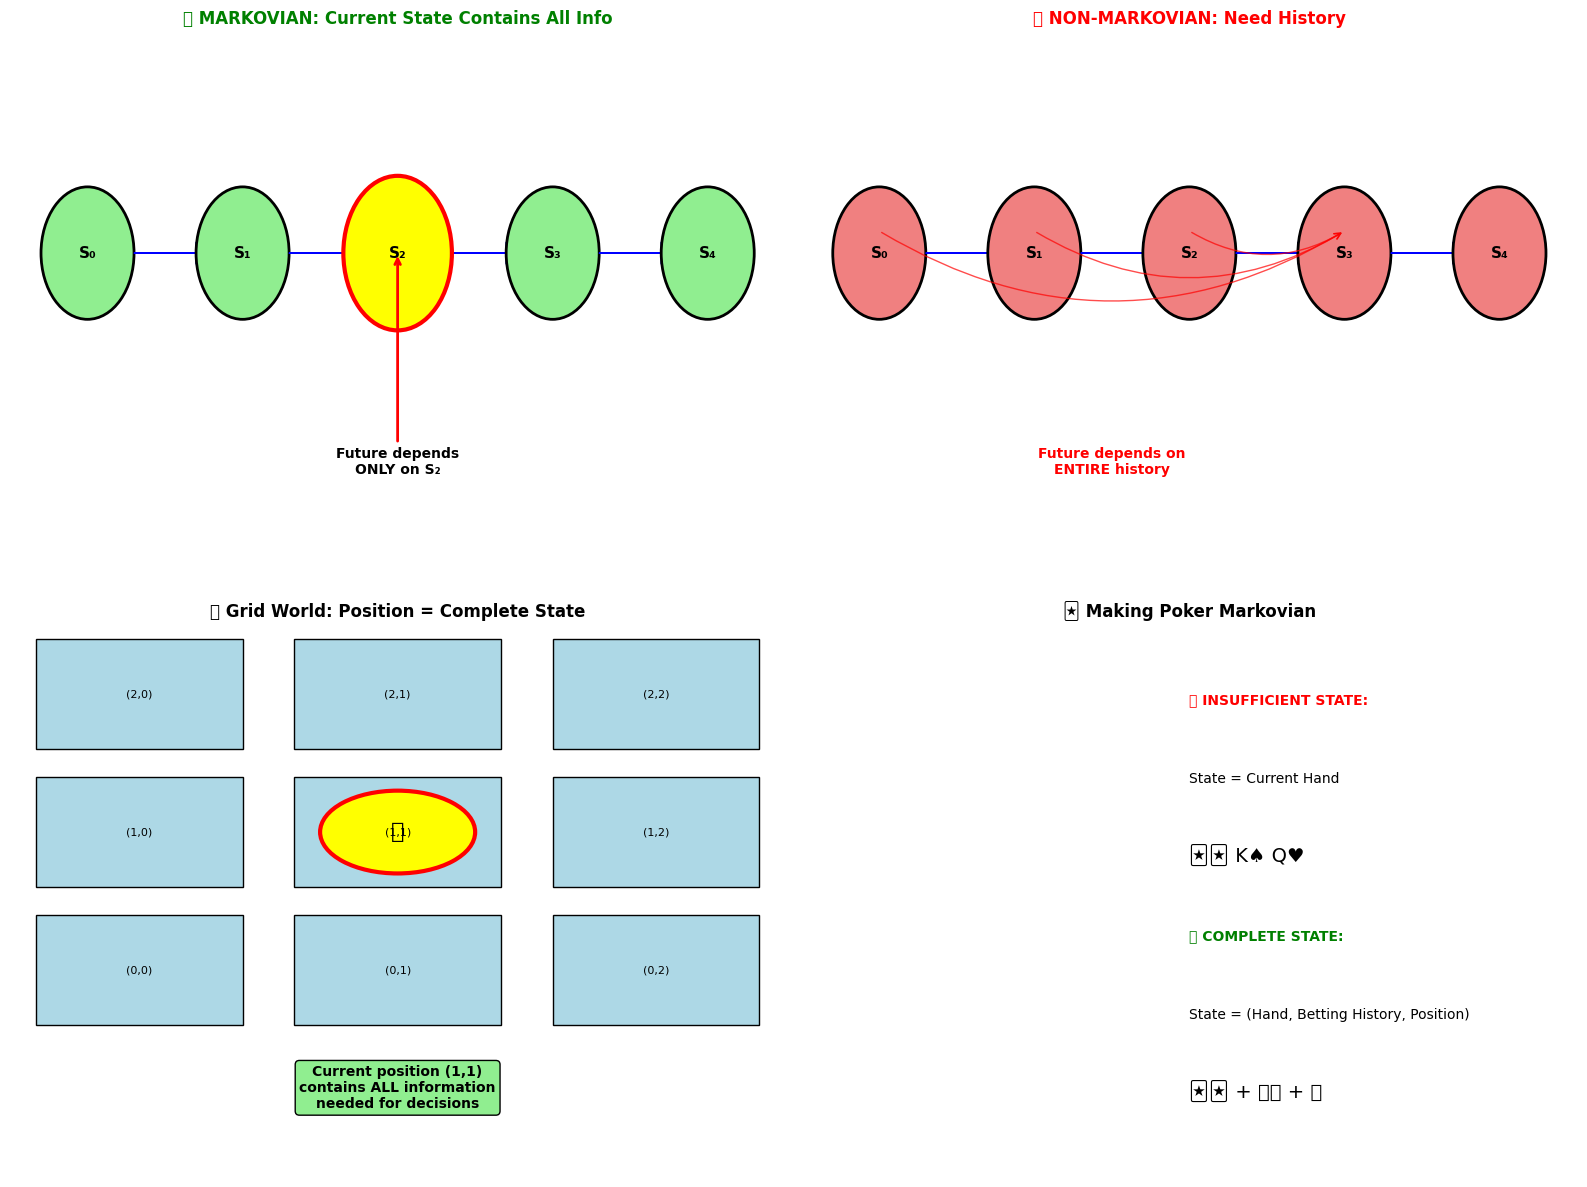

🧪 MARKOV PROPERTY TEST:
Can we predict the next state from ONLY the current state?

📍 Moving right from trap area:
   Current state: (2, 1)
   Action: right
   Next state: (2, 2) (Reward: -5)
   ✅ Predictable from current state alone!

📍 Moving up from jewelry:
   Current state: (1, 2)
   Action: up
   Next state: (0, 2) (Reward: -0.1)
   ✅ Predictable from current state alone!

📍 Moving down toward treasure:
   Current state: (3, 2)
   Action: down
   Next state: (4, 2) (Reward: -0.1)
   ✅ Predictable from current state alone!

📍 Starting position move:
   Current state: (0, 0)
   Action: right
   Next state: (0, 1) (Reward: -0.1)
   ✅ Predictable from current state alone!

🎯 CONCLUSION: Our grid world is Markovian!
   The current position contains ALL information
   needed to predict future states and rewards.


In [4]:
# ================================
# 🎯 Part 3: The Markov Property - Interactive Demonstration
# ================================

print("\n🎯 THE MARKOV PROPERTY: Visual Understanding")
print("=" * 50)

def create_markov_property_diagram():
    """Create comprehensive diagram explaining Markov property"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Diagram 1: Markovian Process
    ax1.set_title('✅ MARKOVIAN: Current State Contains All Info',
                  fontsize=12, fontweight='bold', color='green')

    # Timeline
    times = [0, 1, 2, 3, 4]
    states = ['S₀', 'S₁', 'S₂', 'S₃', 'S₄']

    for i, (t, s) in enumerate(zip(times, states)):
        circle = Circle((t, 0), 0.3, facecolor='lightgreen',
                       edgecolor='black', linewidth=2)
        ax1.add_patch(circle)
        ax1.text(t, 0, s, ha='center', va='center', fontweight='bold')

        if i < len(times) - 1:
            ax1.arrow(t + 0.3, 0, 0.4, 0, head_width=0.1,
                     head_length=0.1, fc='blue', ec='blue')

    # Highlight current state
    current_circle = Circle((2, 0), 0.35, facecolor='yellow',
                           edgecolor='red', linewidth=3)
    ax1.add_patch(current_circle)

    # Future depends only on current
    ax1.annotate('Future depends\nONLY on S₂', xy=(2, 0), xytext=(2, -1),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                ha='center', fontsize=10, fontweight='bold')

    ax1.set_xlim(-0.5, 4.5)
    ax1.set_ylim(-1.5, 1)
    ax1.axis('off')

    # Diagram 2: Non-Markovian Process
    ax2.set_title('❌ NON-MARKOVIAN: Need History',
                  fontsize=12, fontweight='bold', color='red')

    for i, (t, s) in enumerate(zip(times, states)):
        circle = Circle((t, 0), 0.3, facecolor='lightcoral',
                       edgecolor='black', linewidth=2)
        ax2.add_patch(circle)
        ax2.text(t, 0, s, ha='center', va='center', fontweight='bold')

        if i < len(times) - 1:
            ax2.arrow(t + 0.3, 0, 0.4, 0, head_width=0.1,
                     head_length=0.1, fc='blue', ec='blue')

    # Show dependency on history
    for i in range(3):
        ax2.annotate('', xy=(3, 0.1), xytext=(i, 0.1),
                    arrowprops=dict(arrowstyle='->', color='red',
                                  lw=1, alpha=0.7,
                                  connectionstyle="arc3,rad=0.3"))

    ax2.text(1.5, -1, 'Future depends on\nENTIRE history',
             ha='center', fontsize=10, fontweight='bold', color='red')

    ax2.set_xlim(-0.5, 4.5)
    ax2.set_ylim(-1.5, 1)
    ax2.axis('off')

    # Diagram 3: Grid World Example (Markovian)
    ax3.set_title('🗺️ Grid World: Position = Complete State',
                  fontsize=12, fontweight='bold')

    # Simple 3x3 grid
    for i in range(3):
        for j in range(3):
            rect = Rectangle((j-0.4, i-0.4), 0.8, 0.8,
                           facecolor='lightblue',
                           edgecolor='black', linewidth=1)
            ax3.add_patch(rect)
            ax3.text(j, i, f'({i},{j})', ha='center', va='center', fontsize=8)

    # Current position
    current_pos = Circle((1, 1), 0.3, facecolor='yellow',
                        edgecolor='red', linewidth=3)
    ax3.add_patch(current_pos)
    ax3.text(1, 1, '🤖', ha='center', va='center', fontsize=16)

    ax3.text(1, -1, 'Current position (1,1)\ncontains ALL information\nneeded for decisions',
             ha='center', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))

    ax3.set_xlim(-0.5, 2.5)
    ax3.set_ylim(-1.5, 2.5)
    ax3.axis('off')

    # Diagram 4: Poker Example (Non-Markovian → Markovian)
    ax4.set_title('🃏 Making Poker Markovian', fontsize=12, fontweight='bold')

    # Before: Just current cards
    ax4.text(0.5, 3, '❌ INSUFFICIENT STATE:', fontsize=10, fontweight='bold', color='red')
    ax4.text(0.5, 2.5, 'State = Current Hand', fontsize=10)
    ax4.text(0.5, 2, '🃏🃏 K♠ Q♥', fontsize=14)

    # After: Include betting history
    ax4.text(0.5, 1.5, '✅ COMPLETE STATE:', fontsize=10, fontweight='bold', color='green')
    ax4.text(0.5, 1, 'State = (Hand, Betting History, Position)', fontsize=10)
    ax4.text(0.5, 0.5, '🃏🃏 + 💰📊 + 🪑', fontsize=14)

    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 3.5)
    ax4.axis('off')

    plt.tight_layout()
    return fig

markov_fig = create_markov_property_diagram()
plt.show()

class MarkovPropertyTester:
    """Interactive tester for Markov property understanding"""

    def __init__(self, env):
        self.env = env

    def test_transition_prediction(self):
        """Test if we can predict next state from current state only"""
        print("🧪 MARKOV PROPERTY TEST:")
        print("Can we predict the next state from ONLY the current state?")
        print()

        test_cases = [
            ((2, 1), 'right', "Moving right from trap area"),
            ((1, 2), 'up', "Moving up from jewelry"),
            ((3, 2), 'down', "Moving down toward treasure"),
            ((0, 0), 'right', "Starting position move")
        ]

        for state, action, description in test_cases:
            next_state = self.env.get_next_state(state, action)
            reward = self.env.rewards.get(next_state, self.env.default_reward)

            print(f"📍 {description}:")
            print(f"   Current state: {state}")
            print(f"   Action: {action}")
            print(f"   Next state: {next_state} (Reward: {reward})")
            print(f"   ✅ Predictable from current state alone!")
            print()

        print("🎯 CONCLUSION: Our grid world is Markovian!")
        print("   The current position contains ALL information")
        print("   needed to predict future states and rewards.")

markov_tester = MarkovPropertyTester(env)
markov_tester.test_transition_prediction()


🎯 POLICIES: Decision-Making Strategies
🎯 RUNNING COMPREHENSIVE POLICY ANALYSIS...
🧪 COMPREHENSIVE POLICY EVALUATION (150 episodes each)

🔄 Testing 🎲 Random...
   📊 Average Return: -33.34 ± 63.60
   📏 Average Length:   69.9 steps
   🎯 Success Rate:  63.3%
   ⚠️ Trap Hit Rate:  98.7%

🔄 Testing 🎯 Greedy...
   📊 Average Return:  27.40 ± 0.00
   📏 Average Length:    8.0 steps
   🎯 Success Rate: 100.0%
   ⚠️ Trap Hit Rate:   0.0%

🔄 Testing 🛡️ Cautious...
   📊 Average Return:  27.40 ± 0.00
   📏 Average Length:    8.0 steps
   🎯 Success Rate: 100.0%
   ⚠️ Trap Hit Rate:   0.0%

🔄 Testing 🧱 Wall-Following...
   📊 Average Return:  29.40 ± 0.00
   📏 Average Length:    8.0 steps
   🎯 Success Rate: 100.0%
   ⚠️ Trap Hit Rate:   0.0%

🔄 Testing 💎 Treasure Hunter...
   📊 Average Return: -49.00 ± 29.05
   📏 Average Length:  100.0 steps
   🎯 Success Rate:   0.0%
   ⚠️ Trap Hit Rate: 100.0%


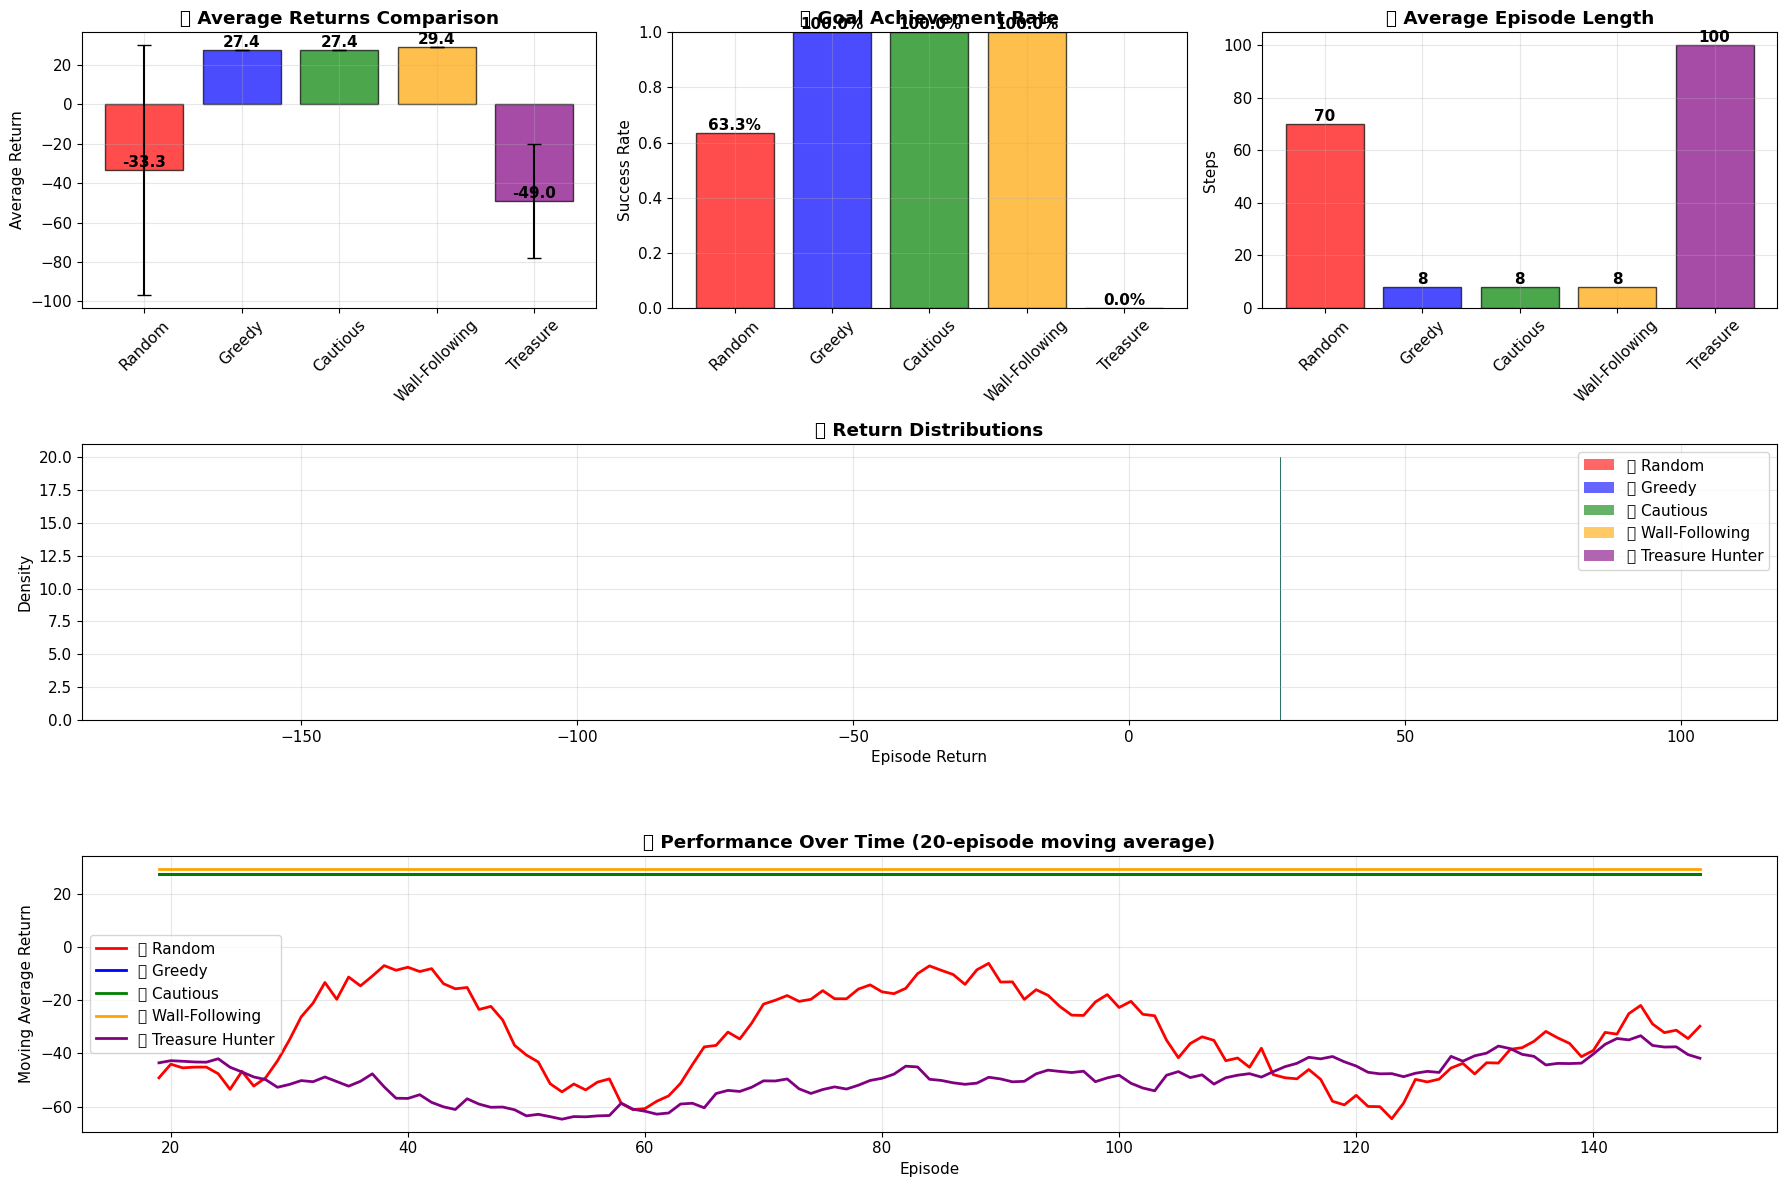

In [5]:
# ================================
# 🎯 Part 4: Policies - Enhanced Analysis and Visualization
# ================================

print("\n🎯 POLICIES: Decision-Making Strategies")
print("=" * 45)

class EnhancedPolicyAnalyzer:
    """Comprehensive policy analysis with rich visualizations"""

    def __init__(self, env):
        self.env = env
        self.policy_stats = {}

    def random_policy(self, state):
        """Random policy: choose actions randomly"""
        actions = self.env.get_possible_actions(state)
        return random.choice(actions) if actions else None

    def greedy_policy(self, state):
        """Greedy policy: always move toward highest-value treasure"""
        row, col = state
        target_row, target_col = 4, 4  # Big treasure

        actions = self.env.get_possible_actions(state)
        if not actions:
            return None

        # Calculate best direction
        if row < target_row and 'down' in actions:
            return 'down'
        elif col < target_col and 'right' in actions:
            return 'right'
        elif row > target_row and 'up' in actions:
            return 'up'
        elif col > target_col and 'left' in actions:
            return 'left'
        else:
            return random.choice(actions)

    def cautious_policy(self, state):
        """Cautious policy: avoid known traps"""
        dangerous_states = {(1,1), (2,2), (3,1)}  # Known traps

        actions = self.env.get_possible_actions(state)
        safe_actions = []

        for action in actions:
            next_state = self.env.get_next_state(state, action)
            if next_state not in dangerous_states:
                safe_actions.append(action)

        if safe_actions:
            # Among safe actions, prefer moving toward treasure
            return self.greedy_policy(state) if self.greedy_policy(state) in safe_actions else random.choice(safe_actions)
        else:
            return random.choice(actions) if actions else None

    def wall_following_policy(self, state):
        """Wall-following policy: follow walls clockwise"""
        row, col = state
        actions = self.env.get_possible_actions(state)

        # Priority order: right, down, left, up (clockwise)
        preferred_order = ['right', 'down', 'left', 'up']

        for action in preferred_order:
            if action in actions:
                return action

        return random.choice(actions) if actions else None

    def treasure_hunting_policy(self, state):
        """Smart treasure hunting: collect small treasures first"""
        row, col = state

        # Define treasure priorities
        treasures = [(1, 2), (4, 1), (2, 4), (4, 4)]  # Small to big

        # Find nearest uncollected treasure
        min_distance = float('inf')
        target = (4, 4)  # Default to big treasure

        for treasure in treasures:
            distance = abs(row - treasure[0]) + abs(col - treasure[1])  # Manhattan distance
            if distance < min_distance:
                min_distance = distance
                target = treasure

        # Move toward target
        target_row, target_col = target
        actions = self.env.get_possible_actions(state)

        if row < target_row and 'down' in actions:
            return 'down'
        elif row > target_row and 'up' in actions:
            return 'up'
        elif col < target_col and 'right' in actions:
            return 'right'
        elif col > target_col and 'left' in actions:
            return 'left'
        else:
            return random.choice(actions) if actions else None

    def comprehensive_policy_test(self, num_episodes=200):
        """Comprehensive testing of all policies"""

        policies = [
            (self.random_policy, "🎲 Random", "red"),
            (self.greedy_policy, "🎯 Greedy", "blue"),
            (self.cautious_policy, "🛡️ Cautious", "green"),
            (self.wall_following_policy, "🧱 Wall-Following", "orange"),
            (self.treasure_hunting_policy, "💎 Treasure Hunter", "purple")
        ]

        results = {}
        detailed_stats = {}

        print(f"🧪 COMPREHENSIVE POLICY EVALUATION ({num_episodes} episodes each)")
        print("=" * 65)

        for policy_func, name, color in policies:
            print(f"\n🔄 Testing {name}...")

            returns = []
            episode_lengths = []
            success_count = 0
            trap_hits = 0

            for episode in range(num_episodes):
                self.env.reset()
                episode_reward = 0
                steps = 0
                hit_trap = False
                max_steps = 100

                while not self.env.done and steps < max_steps:
                    action = policy_func(self.env.state)
                    if action is None:
                        break

                    old_state = self.env.state
                    _, reward, done, info = self.env.step(action)

                    episode_reward += reward
                    steps += 1

                    # Track trap hits
                    if reward < -1:
                        hit_trap = True

                returns.append(episode_reward)
                episode_lengths.append(steps)

                if self.env.state == (4, 4):  # Reached goal
                    success_count += 1

                if hit_trap:
                    trap_hits += 1

            # Calculate statistics
            avg_return = np.mean(returns)
            std_return = np.std(returns)
            avg_length = np.mean(episode_lengths)
            success_rate = success_count / num_episodes
            trap_rate = trap_hits / num_episodes

            results[name] = {
                'returns': returns,
                'avg_return': avg_return,
                'std_return': std_return,
                'avg_length': avg_length,
                'success_rate': success_rate,
                'trap_rate': trap_rate,
                'color': color
            }

            print(f"   📊 Average Return: {avg_return:6.2f} ± {std_return:.2f}")
            print(f"   📏 Average Length: {avg_length:6.1f} steps")
            print(f"   🎯 Success Rate: {success_rate:6.1%}")
            print(f"   ⚠️ Trap Hit Rate: {trap_rate:6.1%}")

        return results

    def visualize_policy_comparison(self, results):
        """Create comprehensive visualization of policy performance"""

        fig = plt.figure(figsize=(18, 12))

        # Create a 2x3 grid of subplots
        gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

        # Plot 1: Average Returns Comparison
        ax1 = fig.add_subplot(gs[0, 0])
        names = list(results.keys())
        avgs = [results[name]['avg_return'] for name in names]
        stds = [results[name]['std_return'] for name in names]
        colors = [results[name]['color'] for name in names]

        bars = ax1.bar(range(len(names)), avgs, yerr=stds, capsize=5,
                      color=colors, alpha=0.7, edgecolor='black')
        ax1.set_title('📊 Average Returns Comparison', fontweight='bold')
        ax1.set_ylabel('Average Return')
        ax1.set_xticks(range(len(names)))
        ax1.set_xticklabels([name.split()[1] for name in names], rotation=45)
        ax1.grid(True, alpha=0.3)

        # Add value labels
        for bar, avg in zip(bars, avgs):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{avg:.1f}', ha='center', va='bottom', fontweight='bold')

        # Plot 2: Success Rates
        ax2 = fig.add_subplot(gs[0, 1])
        success_rates = [results[name]['success_rate'] for name in names]

        bars2 = ax2.bar(range(len(names)), success_rates, color=colors,
                       alpha=0.7, edgecolor='black')
        ax2.set_title('🎯 Goal Achievement Rate', fontweight='bold')
        ax2.set_ylabel('Success Rate')
        ax2.set_xticks(range(len(names)))
        ax2.set_xticklabels([name.split()[1] for name in names], rotation=45)
        ax2.set_ylim(0, 1)
        ax2.grid(True, alpha=0.3)

        for bar, rate in zip(bars2, success_rates):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

        # Plot 3: Episode Lengths
        ax3 = fig.add_subplot(gs[0, 2])
        avg_lengths = [results[name]['avg_length'] for name in names]

        bars3 = ax3.bar(range(len(names)), avg_lengths, color=colors,
                       alpha=0.7, edgecolor='black')
        ax3.set_title('📏 Average Episode Length', fontweight='bold')
        ax3.set_ylabel('Steps')
        ax3.set_xticks(range(len(names)))
        ax3.set_xticklabels([name.split()[1] for name in names], rotation=45)
        ax3.grid(True, alpha=0.3)

        for bar, length in zip(bars3, avg_lengths):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{length:.0f}', ha='center', va='bottom', fontweight='bold')

        # Plot 4: Return Distributions
        ax4 = fig.add_subplot(gs[1, :])
        for i, name in enumerate(names):
            returns = results[name]['returns']
            ax4.hist(returns, bins=20, alpha=0.6, label=name,
                    color=results[name]['color'], density=True)

        ax4.set_title('📈 Return Distributions', fontweight='bold')
        ax4.set_xlabel('Episode Return')
        ax4.set_ylabel('Density')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        # Plot 5: Learning Curves
        ax5 = fig.add_subplot(gs[2, :])
        for name in names:
            returns = results[name]['returns']
            # Calculate moving average
            window = 20
            moving_avg = np.convolve(returns, np.ones(window)/window, mode='valid')
            episodes = range(window-1, len(returns))

            ax5.plot(episodes, moving_avg, label=name,
                    color=results[name]['color'], linewidth=2)

        ax5.set_title('📊 Performance Over Time (20-episode moving average)', fontweight='bold')
        ax5.set_xlabel('Episode')
        ax5.set_ylabel('Moving Average Return')
        ax5.legend()
        ax5.grid(True, alpha=0.3)

        plt.tight_layout()
        return fig

# Run comprehensive policy analysis
print("🎯 RUNNING COMPREHENSIVE POLICY ANALYSIS...")
analyzer = EnhancedPolicyAnalyzer(env)
policy_results = analyzer.comprehensive_policy_test(num_episodes=150)

# Create visualization
policy_comparison_fig = analyzer.visualize_policy_comparison(policy_results)
plt.show()


🎯 VALUE FUNCTIONS: Quantifying State Quality


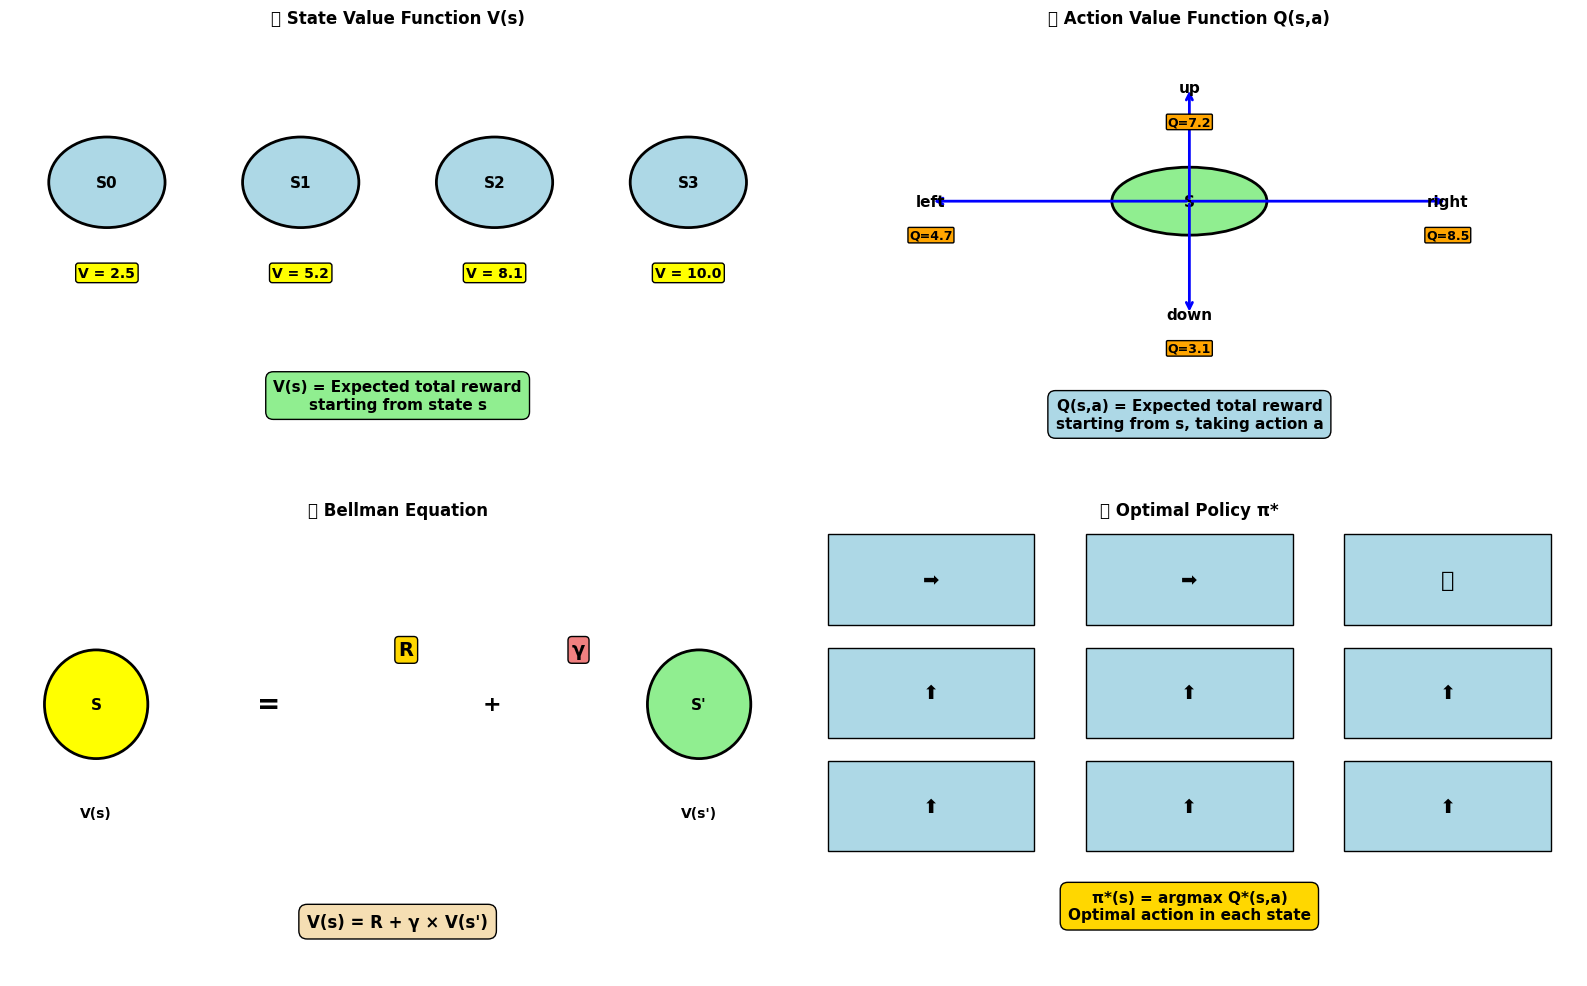


📊 VALUE FUNCTION ANALYSIS:

🔍 Analyzing 🎯 Greedy Policy...
📊 TRACKING VALUE EVOLUTION FOR 🎯 GREEDY


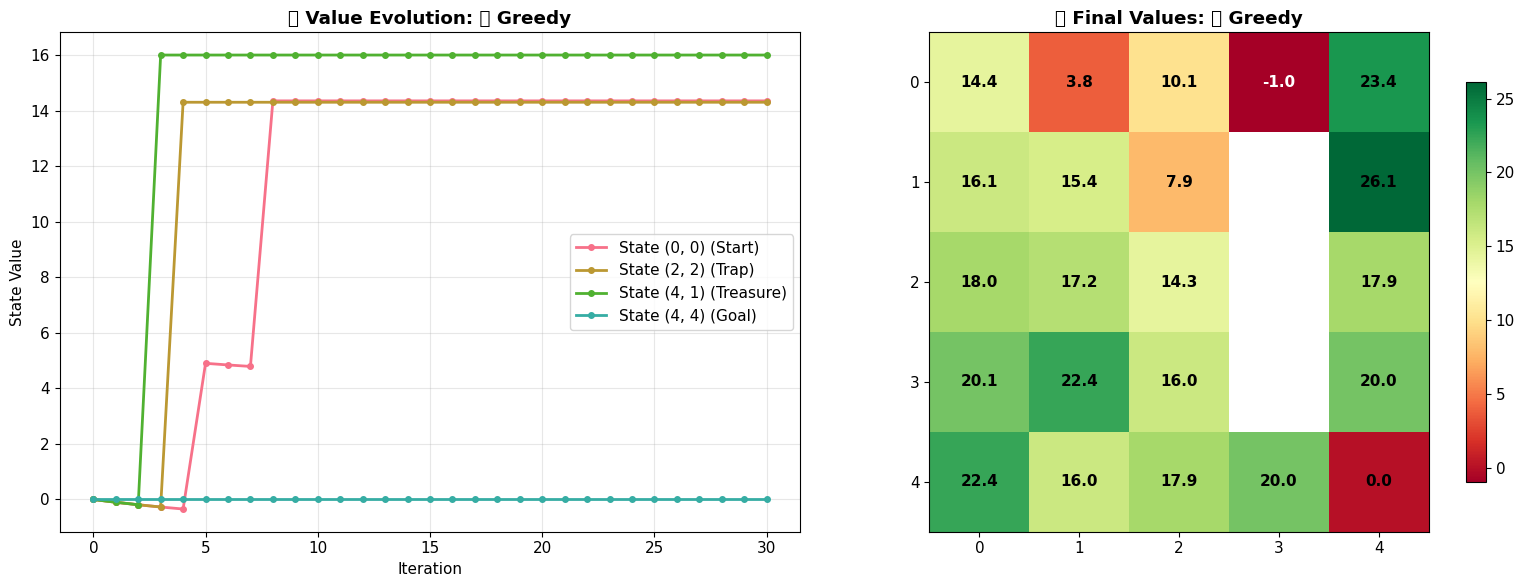


🔍 Analyzing 💎 Treasure Hunter Policy...
📊 TRACKING VALUE EVOLUTION FOR 💎 TREASURE HUNTER


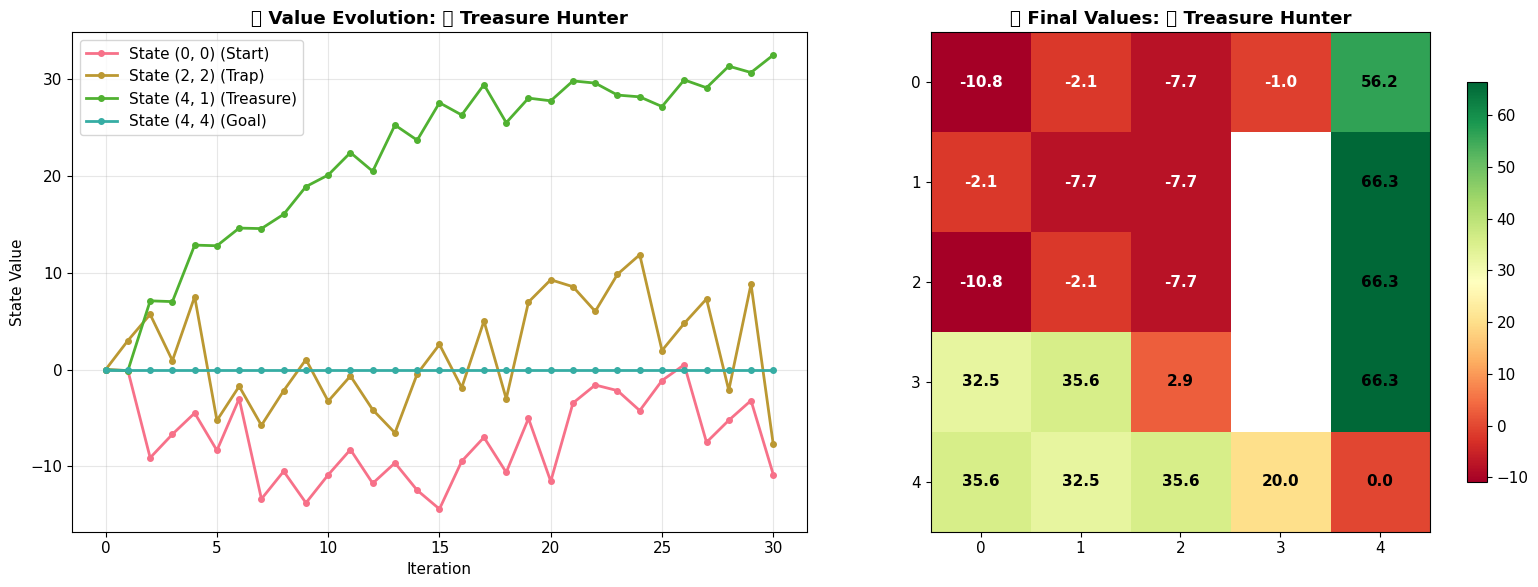


🔍 Analyzing 🛡️ Cautious Policy...
📊 TRACKING VALUE EVOLUTION FOR 🛡️ CAUTIOUS


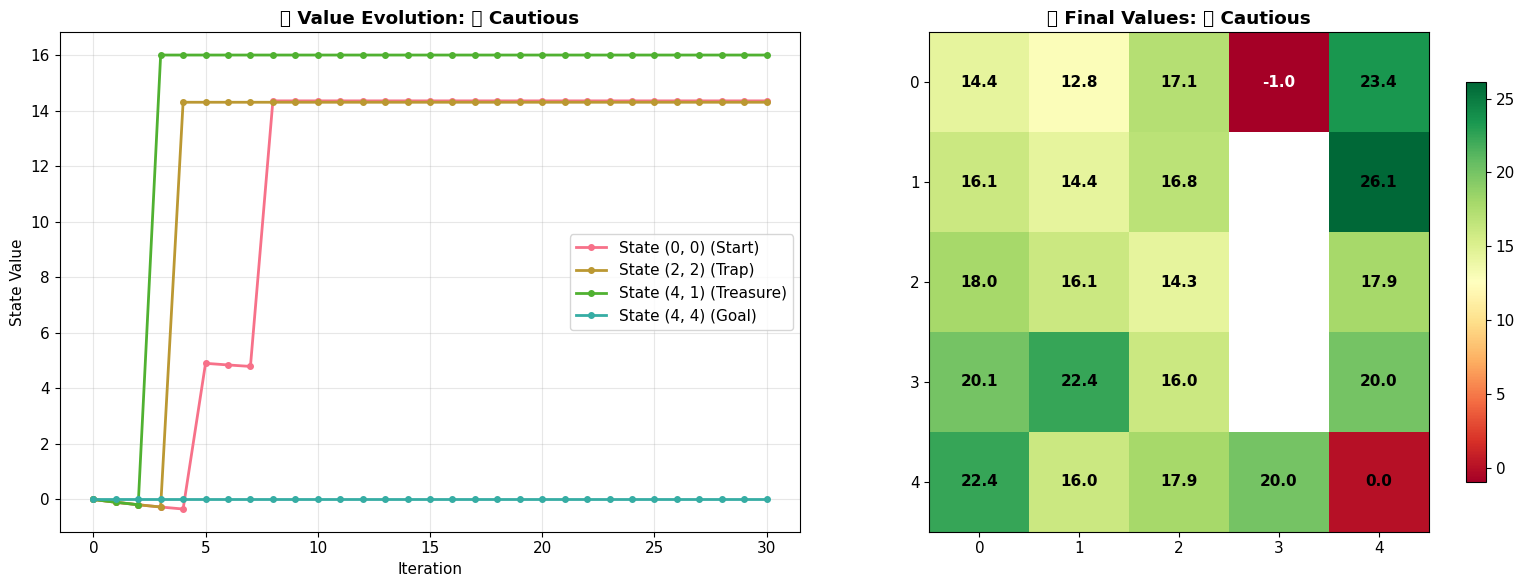

In [7]:
# ================================
# 🎯 Part 5: Value Functions - Mathematical Foundation
# ================================

print("\n🎯 VALUE FUNCTIONS: Quantifying State Quality")
print("=" * 50)

class ValueFunctionVisualizer:
    """Advanced value function calculator with rich visualizations"""

    def __init__(self, env, gamma=0.9):
        self.env = env
        self.gamma = gamma
        self.states = env.get_all_states()

    def create_value_function_theory_diagram(self):
        """Create diagram explaining value function concepts"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

        # Diagram 1: State Value Function
        ax1.set_title('💎 State Value Function V(s)', fontsize=12, fontweight='bold')

        # Draw states with different values
        states_values = [(0, 0, 2.5), (1, 0, 5.2), (2, 0, 8.1), (3, 0, 10.0)]

        for x, y, value in states_values:
            # State circle
            circle = Circle((x, y), 0.3, facecolor='lightblue',
                           edgecolor='black', linewidth=2)
            ax1.add_patch(circle)
            ax1.text(x, y, f'S{x}', ha='center', va='center', fontweight='bold')

            # Value below
            ax1.text(x, y-0.6, f'V = {value:.1f}', ha='center', va='center',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow'))

        ax1.text(1.5, -1.5, 'V(s) = Expected total reward\nstarting from state s',
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgreen'))

        ax1.set_xlim(-0.5, 3.5)
        ax1.set_ylim(-2, 1)
        ax1.axis('off')

        # Diagram 2: Action Value Function
        ax2.set_title('🎯 Action Value Function Q(s,a)', fontsize=12, fontweight='bold')

        # Central state
        center_circle = Circle((1, 0), 0.3, facecolor='lightgreen',
                              edgecolor='black', linewidth=2)
        ax2.add_patch(center_circle)
        ax2.text(1, 0, 'S', ha='center', va='center', fontweight='bold')

        # Actions with Q-values
        actions = [
            (1, 1, 'up', 7.2),
            (2, 0, 'right', 8.5),
            (1, -1, 'down', 3.1),
            (0, 0, 'left', 4.7)
        ]

        for x, y, action, q_value in actions:
            ax2.annotate('', xy=(x, y), xytext=(1, 0),
                        arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
            ax2.text(x, y, action, ha='center', va='center', fontweight='bold')
            ax2.text(x, y-0.3, f'Q={q_value:.1f}', ha='center', va='center',
                    fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.1", facecolor='orange'))

        ax2.text(1, -2, 'Q(s,a) = Expected total reward\nstarting from s, taking action a',
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue'))

        ax2.set_xlim(-0.5, 2.5)
        ax2.set_ylim(-2.5, 1.5)
        ax2.axis('off')

        # Diagram 3: Bellman Equation Visual
        ax3.set_title('🧮 Bellman Equation', fontsize=12, fontweight='bold')

        # Current state
        current = Circle((0, 0), 0.3, facecolor='yellow',
                        edgecolor='black', linewidth=2)
        ax3.add_patch(current)
        ax3.text(0, 0, 'S', ha='center', va='center', fontweight='bold')
        ax3.text(0, -0.6, 'V(s)', ha='center', va='center', fontsize=10, fontweight='bold')

        # Equals sign
        ax3.text(1, 0, '=', ha='center', va='center', fontsize=20, fontweight='bold')

        # Immediate reward
        ax3.text(1.8, 0.3, 'R', ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='gold'))

        # Plus sign
        ax3.text(2.3, 0, '+', ha='center', va='center', fontsize=16, fontweight='bold')

        # Discount factor
        ax3.text(2.8, 0.3, 'γ', ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='lightcoral'))

        # Future value
        future = Circle((3.5, 0), 0.3, facecolor='lightgreen',
                       edgecolor='black', linewidth=2)
        ax3.add_patch(future)
        ax3.text(3.5, 0, "S'", ha='center', va='center', fontweight='bold')
        ax3.text(3.5, -0.6, "V(s')", ha='center', va='center', fontsize=10, fontweight='bold')

        ax3.text(1.75, -1.2, 'V(s) = R + γ × V(s\')', ha='center', va='center',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat'))

        ax3.set_xlim(-0.5, 4)
        ax3.set_ylim(-1.5, 1)
        ax3.axis('off')

        # Diagram 4: Optimal Policy
        ax4.set_title('🏆 Optimal Policy π*', fontsize=12, fontweight='bold')

        # Grid showing optimal actions
        for i in range(3):
            for j in range(3):
                rect = Rectangle((j-0.4, i-0.4), 0.8, 0.8,
                               facecolor='lightblue',
                               edgecolor='black', linewidth=1)
                ax4.add_patch(rect)

                # Add optimal action arrows
                if i == 2 and j == 2:  # Goal
                    ax4.text(j, i, '🏆', ha='center', va='center', fontsize=16)
                else:
                    # Simple optimal policy toward goal
                    if i < 2:
                        arrow = '⬆️'
                    elif j < 2:
                        arrow = '➡️'
                    else:
                        arrow = '🎯'
                    ax4.text(j, i, arrow, ha='center', va='center', fontsize=14)

        ax4.text(1, -1, 'π*(s) = argmax Q*(s,a)\nOptimal action in each state',
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='gold'))

        ax4.set_xlim(-0.5, 2.5)
        ax4.set_ylim(-1.5, 2.5)
        ax4.axis('off')

        plt.tight_layout()
        return fig

    def policy_evaluation(self, policy, max_iterations=100, tolerance=1e-6,
                         track_convergence=True):
        """Enhanced policy evaluation with convergence tracking"""

        # Initialize value function
        V = {state: 0.0 for state in self.states}
        convergence_data = []

        print(f"🔄 POLICY EVALUATION:")
        print(f"   Max iterations: {max_iterations}")
        print(f"   Tolerance: {tolerance}")
        print()

        for iteration in range(max_iterations):
            V_new = V.copy()
            max_change = 0

            for state in self.states:
                if state in self.env.terminals:
                    continue

                action = policy(state)
                if action is None:
                    continue

                next_state = self.env.get_next_state(state, action)
                reward = self.env.rewards.get(next_state, self.env.default_reward)

                # Bellman equation for policy evaluation
                V_new[state] = reward + self.gamma * V[next_state]

                change = abs(V_new[state] - V[state])
                max_change = max(max_change, change)

            V = V_new

            if track_convergence:
                convergence_data.append(max_change)

            # Progress reporting
            if iteration % 10 == 0 or iteration < 5:
                print(f"   Iteration {iteration:3d}: Max change = {max_change:.8f}")

            if max_change < tolerance:
                print(f"   ✅ Converged after {iteration + 1} iterations!")
                break

        return V, convergence_data

    def visualize_value_evolution(self, policy, policy_name="Policy"):
        """Visualize how values evolve during policy evaluation"""

        # Track value evolution for key states
        key_states = [(0, 0), (2, 2), (4, 1), (4, 4)]

        # Initialize
        V = {state: 0.0 for state in self.states}
        value_evolution = {state: [0.0] for state in key_states}

        print(f"📊 TRACKING VALUE EVOLUTION FOR {policy_name.upper()}")
        print("=" * 50)

        # Run policy evaluation with tracking
        for iteration in range(30):  # More iterations for visualization
            V_new = V.copy()

            for state in self.states:
                if state in self.env.terminals:
                    continue

                action = policy(state)
                if action is None:
                    continue

                next_state = self.env.get_next_state(state, action)
                reward = self.env.rewards.get(next_state, self.env.default_reward)
                V_new[state] = reward + self.gamma * V[next_state]

            V = V_new

            # Track key states
            for state in key_states:
                value_evolution[state].append(V[state])

        # Plot evolution
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Plot 1: Value evolution over iterations
        for state in key_states:
            label = f"State {state}"
            if state == (0, 0):
                label += " (Start)"
            elif state == (4, 4):
                label += " (Goal)"
            elif state in self.env.rewards and self.env.rewards[state] > 0:
                label += " (Treasure)"
            elif state in self.env.rewards and self.env.rewards[state] < 0:
                label += " (Trap)"

            ax1.plot(value_evolution[state], marker='o', linewidth=2,
                    markersize=4, label=label)

        ax1.set_title(f'📈 Value Evolution: {policy_name}', fontweight='bold')
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('State Value')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Final value heatmap
        value_grid = np.full((self.env.height, self.env.width), np.nan)
        for (row, col), value in V.items():
            value_grid[row, col] = value

        im = ax2.imshow(value_grid, cmap='RdYlGn', interpolation='nearest')

        # Add text annotations
        for row in range(self.env.height):
            for col in range(self.env.width):
                if (row, col) in V:
                    ax2.text(col, row, f'{V[(row, col)]:.1f}',
                            ha='center', va='center', fontweight='bold',
                            color='white' if V[(row, col)] < 0 else 'black')

        ax2.set_title(f'💎 Final Values: {policy_name}', fontweight='bold')
        plt.colorbar(im, ax=ax2, shrink=0.8)

        plt.tight_layout()
        return fig, V

# Create theoretical foundation diagram
value_viz = ValueFunctionVisualizer(env)
theory_fig = value_viz.create_value_function_theory_diagram()
plt.show()

# Analyze value functions for different policies
print("\n📊 VALUE FUNCTION ANALYSIS:")
print("=" * 35)

# Select best policies from previous analysis
best_policies = [
    (analyzer.greedy_policy, "🎯 Greedy"),
    (analyzer.treasure_hunting_policy, "💎 Treasure Hunter"),
    (analyzer.cautious_policy, "🛡️ Cautious")
]

policy_values = {}
for policy_func, name in best_policies:
    print(f"\n🔍 Analyzing {name} Policy...")
    evolution_fig, values = value_viz.visualize_value_evolution(policy_func, name)
    policy_values[name] = values
    plt.show()


🧮 THE BELLMAN EQUATION: Interactive Implementation


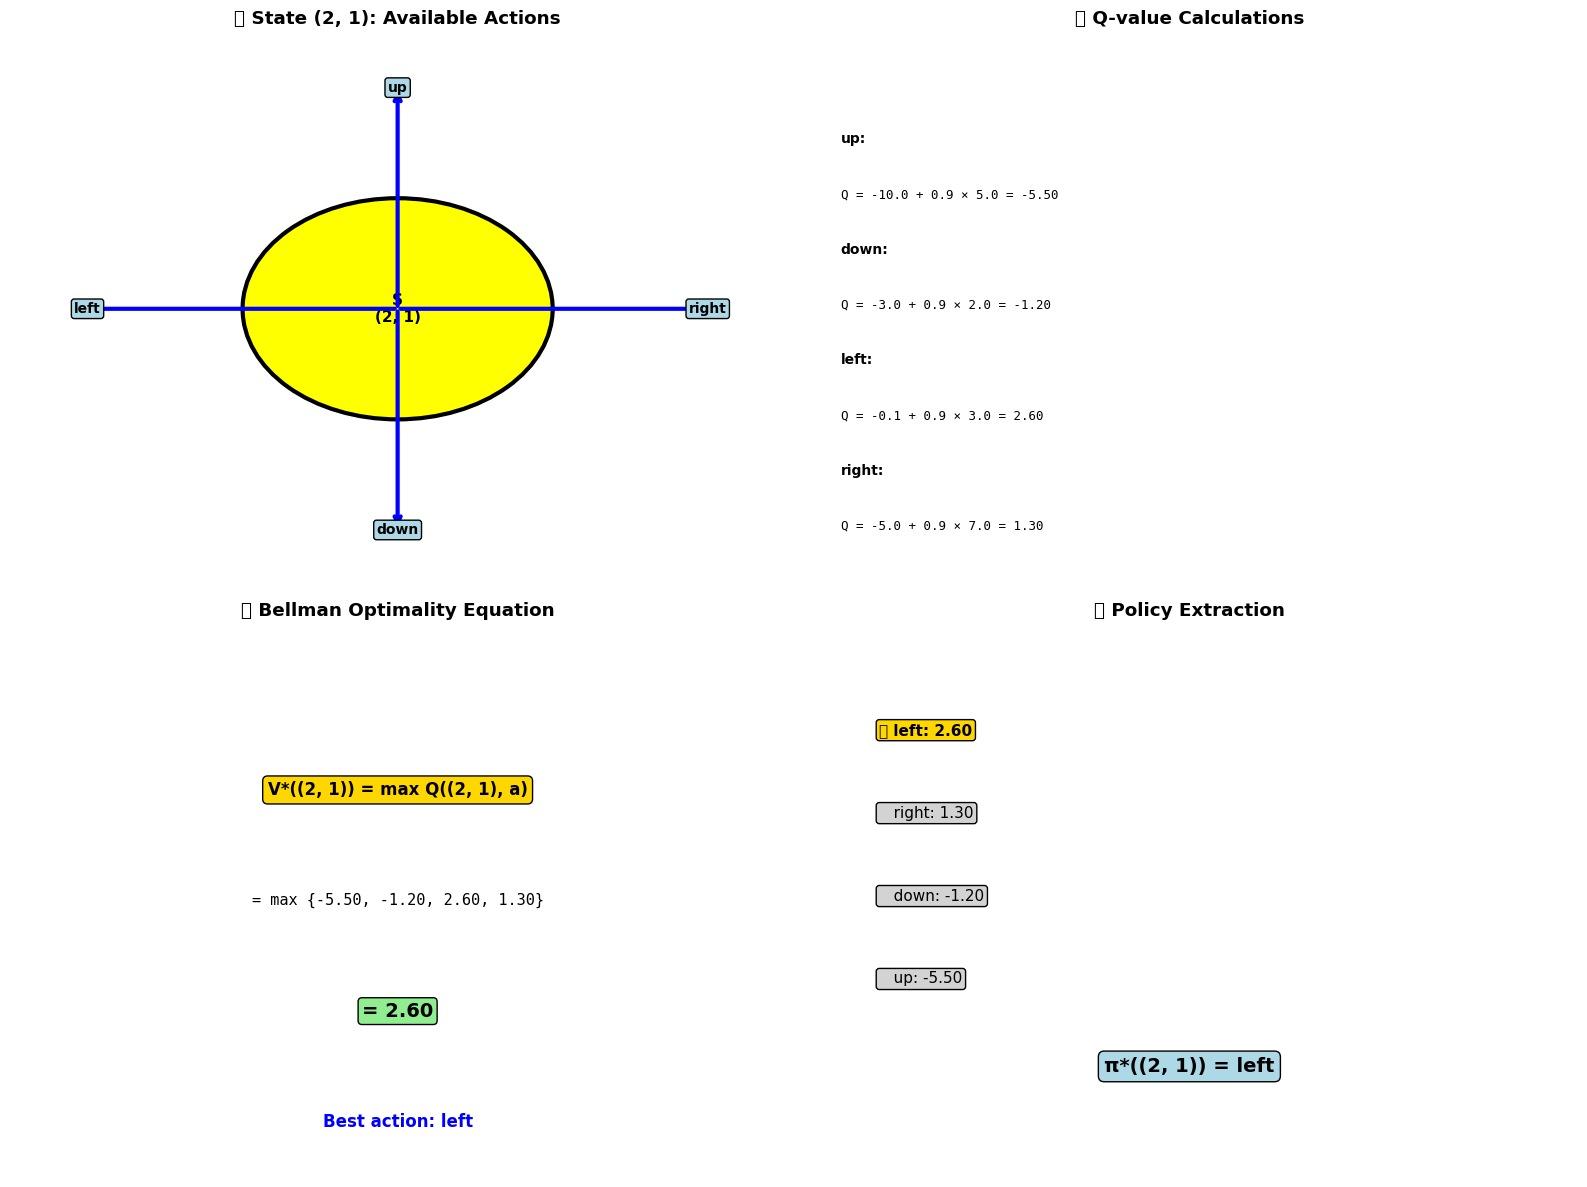

🧮 INTERACTIVE BELLMAN CALCULATOR
   Analyzing state: (2, 1)
📍 Available actions from (2, 1): ['up', 'down', 'left', 'right']

🔢 STEP-BY-STEP CALCULATION:
------------------------------
🎯 Action 'up':
   Next state: (1, 1)
   Immediate reward: -10.0
   Assumed V((1, 1)): 5.0
   Q((2, 1), up) = -10.0 + 0.9 × 5.0
                      = -5.500

🎯 Action 'down':
   Next state: (3, 1)
   Immediate reward: -3.0
   Assumed V((3, 1)): 5.0
   Q((2, 1), down) = -3.0 + 0.9 × 5.0
                      = 1.500

🎯 Action 'left':
   Next state: (2, 0)
   Immediate reward: -0.1
   Assumed V((2, 0)): 5.0
   Q((2, 1), left) = -0.1 + 0.9 × 5.0
                      = 4.400

🎯 Action 'right':
   Next state: (2, 2)
   Immediate reward: -5.0
   Assumed V((2, 2)): 5.0
   Q((2, 1), right) = -5.0 + 0.9 × 5.0
                      = -0.500

🏆 OPTIMAL CHOICE:
   V*((2, 1)) = max(-5.500, 1.500, 4.400, -0.500)
   V*((2, 1)) = 4.400
   π*((2, 1)) = left


In [8]:

# ================================
# 🎯 Part 6: The Bellman Equation - Interactive Implementation
# ================================

print("\n🧮 THE BELLMAN EQUATION: Interactive Implementation")
print("=" * 55)

class BellmanEquationDemo:
    """Interactive demonstration of Bellman equation calculations"""

    def __init__(self, env, gamma=0.9):
        self.env = env
        self.gamma = gamma

    def create_bellman_visualization(self):
        """Create step-by-step Bellman equation visualization"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # Choose a specific state for detailed analysis
        demo_state = (2, 1)

        # Get all possible actions from this state
        actions = self.env.get_possible_actions(demo_state)

        # Subplot 1: Current state and actions
        ax1 = axes[0, 0]
        ax1.set_title(f'🎯 State {demo_state}: Available Actions', fontweight='bold')

        # Draw current state
        current_circle = Circle((1, 1), 0.4, facecolor='yellow',
                               edgecolor='black', linewidth=3)
        ax1.add_patch(current_circle)
        ax1.text(1, 1, f'S\n{demo_state}', ha='center', va='center', fontweight='bold')

        # Draw action arrows
        arrow_positions = {'up': (1, 1.8), 'down': (1, 0.2),
                          'left': (0.2, 1), 'right': (1.8, 1)}

        for i, action in enumerate(actions):
            if action in arrow_positions:
                pos = arrow_positions[action]
                ax1.annotate('', xy=pos, xytext=(1, 1),
                            arrowprops=dict(arrowstyle='->', lw=3, color='blue'))
                ax1.text(pos[0], pos[1], action, ha='center', va='center',
                        fontweight='bold', fontsize=10,
                        bbox=dict(boxstyle="round,pad=0.2", facecolor='lightblue'))

        ax1.set_xlim(0, 2)
        ax1.set_ylim(0, 2)
        ax1.axis('off')

        # Subplot 2: Q-values calculation
        ax2 = axes[0, 1]
        ax2.set_title('💰 Q-value Calculations', fontweight='bold')

        # Calculate Q-values for each action
        q_values = {}
        assumed_next_values = {'up': 5.0, 'down': 2.0, 'left': 3.0, 'right': 7.0}

        y_pos = 0.8
        for action in actions:
            next_state = self.env.get_next_state(demo_state, action)
            reward = self.env.rewards.get(next_state, self.env.default_reward)
            next_value = assumed_next_values.get(action, 0.0)

            q_value = reward + self.gamma * next_value
            q_values[action] = q_value

            # Display calculation
            ax2.text(0.05, y_pos, f"{action}:", fontweight='bold', fontsize=10)
            ax2.text(0.05, y_pos - 0.1,
                    f"Q = {reward:.1f} + {self.gamma:.1f} × {next_value:.1f} = {q_value:.2f}",
                    fontsize=9, family='monospace')
            y_pos -= 0.2

        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
        ax2.axis('off')

        # Subplot 3: Bellman optimality
        ax3 = axes[1, 0]
        ax3.set_title('🏆 Bellman Optimality Equation', fontweight='bold')

        best_action = max(q_values.keys(), key=lambda a: q_values[a])
        best_q_value = q_values[best_action]

        # Visual equation
        ax3.text(0.5, 0.7, f"V*({demo_state}) = max Q({demo_state}, a)",
                ha='center', va='center', fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='gold'))

        ax3.text(0.5, 0.5, f"= max {{{', '.join([f'{v:.2f}' for v in q_values.values()])}}}",
                ha='center', va='center', fontsize=11, family='monospace')

        ax3.text(0.5, 0.3, f"= {best_q_value:.2f}",
                ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='lightgreen'))

        ax3.text(0.5, 0.1, f"Best action: {best_action}",
                ha='center', va='center', fontsize=12, fontweight='bold', color='blue')

        ax3.set_xlim(0, 1)
        ax3.set_ylim(0, 1)
        ax3.axis('off')

        # Subplot 4: Policy extraction
        ax4 = axes[1, 1]
        ax4.set_title('🧭 Policy Extraction', fontweight='bold')

        # Show policy as action selection
        sorted_actions = sorted(q_values.items(), key=lambda x: x[1], reverse=True)

        y_pos = 0.8
        for i, (action, q_val) in enumerate(sorted_actions):
            color = 'gold' if action == best_action else 'lightgray'
            marker = '👑' if action == best_action else '  '

            ax4.text(0.1, y_pos, f"{marker} {action}: {q_val:.2f}",
                    fontsize=11, fontweight='bold' if action == best_action else 'normal',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor=color))
            y_pos -= 0.15

        ax4.text(0.5, 0.2, f"π*({demo_state}) = {best_action}",
                ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))

        ax4.set_xlim(0, 1)
        ax4.set_ylim(0, 1)
        ax4.axis('off')

        plt.tight_layout()
        return fig

    def interactive_bellman_calculator(self, state=(2, 1)):
        """Interactive Bellman equation calculator"""
        print(f"🧮 INTERACTIVE BELLMAN CALCULATOR")
        print(f"   Analyzing state: {state}")
        print("=" * 40)

        actions = self.env.get_possible_actions(state)
        print(f"📍 Available actions from {state}: {actions}")
        print()

        print("🔢 STEP-BY-STEP CALCULATION:")
        print("-" * 30)

        q_values = {}
        for i, action in enumerate(actions):
            next_state = self.env.get_next_state(state, action)
            reward = self.env.rewards.get(next_state, self.env.default_reward)

            # For demo, assume some next state values
            assumed_value = 5.0  # Simplified for clarity

            q_value = reward + self.gamma * assumed_value
            q_values[action] = q_value

            print(f"🎯 Action '{action}':")
            print(f"   Next state: {next_state}")
            print(f"   Immediate reward: {reward:+.1f}")
            print(f"   Assumed V({next_state}): {assumed_value:.1f}")
            print(f"   Q({state}, {action}) = {reward:+.1f} + {self.gamma:.1f} × {assumed_value:.1f}")
            print(f"                      = {q_value:.3f}")
            print()

        # Find optimal action
        best_action = max(q_values.keys(), key=lambda a: q_values[a])
        best_value = q_values[best_action]

        print("🏆 OPTIMAL CHOICE:")
        print(f"   V*({state}) = max({', '.join([f'{v:.3f}' for v in q_values.values()])})")
        print(f"   V*({state}) = {best_value:.3f}")
        print(f"   π*({state}) = {best_action}")

        return q_values, best_action, best_value

# Create Bellman visualization
bellman_demo = BellmanEquationDemo(env)
bellman_fig = bellman_demo.create_bellman_visualization()
plt.show()

# Run interactive calculator
q_vals, optimal_action, optimal_value = bellman_demo.interactive_bellman_calculator()


🎯 VALUE ITERATION: Finding Optimal Policies
🎯 SOLVING OUR TREASURE HUNT MDP
🎯 SOLVING MDP WITH VALUE ITERATION
🔄 VALUE ITERATION ALGORITHM
📊 Parameters:
   Discount factor (γ): 0.9
   Convergence tolerance: 1e-06
   Maximum iterations: 100

   Iteration   0: Max change = 20.00000000
   Iteration   1: Max change = 9.90000000
   Iteration   2: Max change = 8.91000000
   Iteration   3: Max change = 8.01900000
   Iteration   4: Max change = 7.21710000
   Iteration   5: Max change = 6.49539000
   Iteration   6: Max change = 5.84585100
   Iteration   7: Max change = 4.78296900
   Iteration   8: Max change = 4.30467210
   Iteration   9: Max change = 3.87420489
   Iteration  10: Max change = 3.48678440
   Iteration  20: Max change = 1.21576655
   Iteration  30: Max change = 0.42391158
   Iteration  40: Max change = 0.14780883
   Iteration  50: Max change = 0.05153775
   Iteration  60: Max change = 0.01797010
   Iteration  70: Max change = 0.00626579
   Iteration  80: Max change = 0.00218475
 

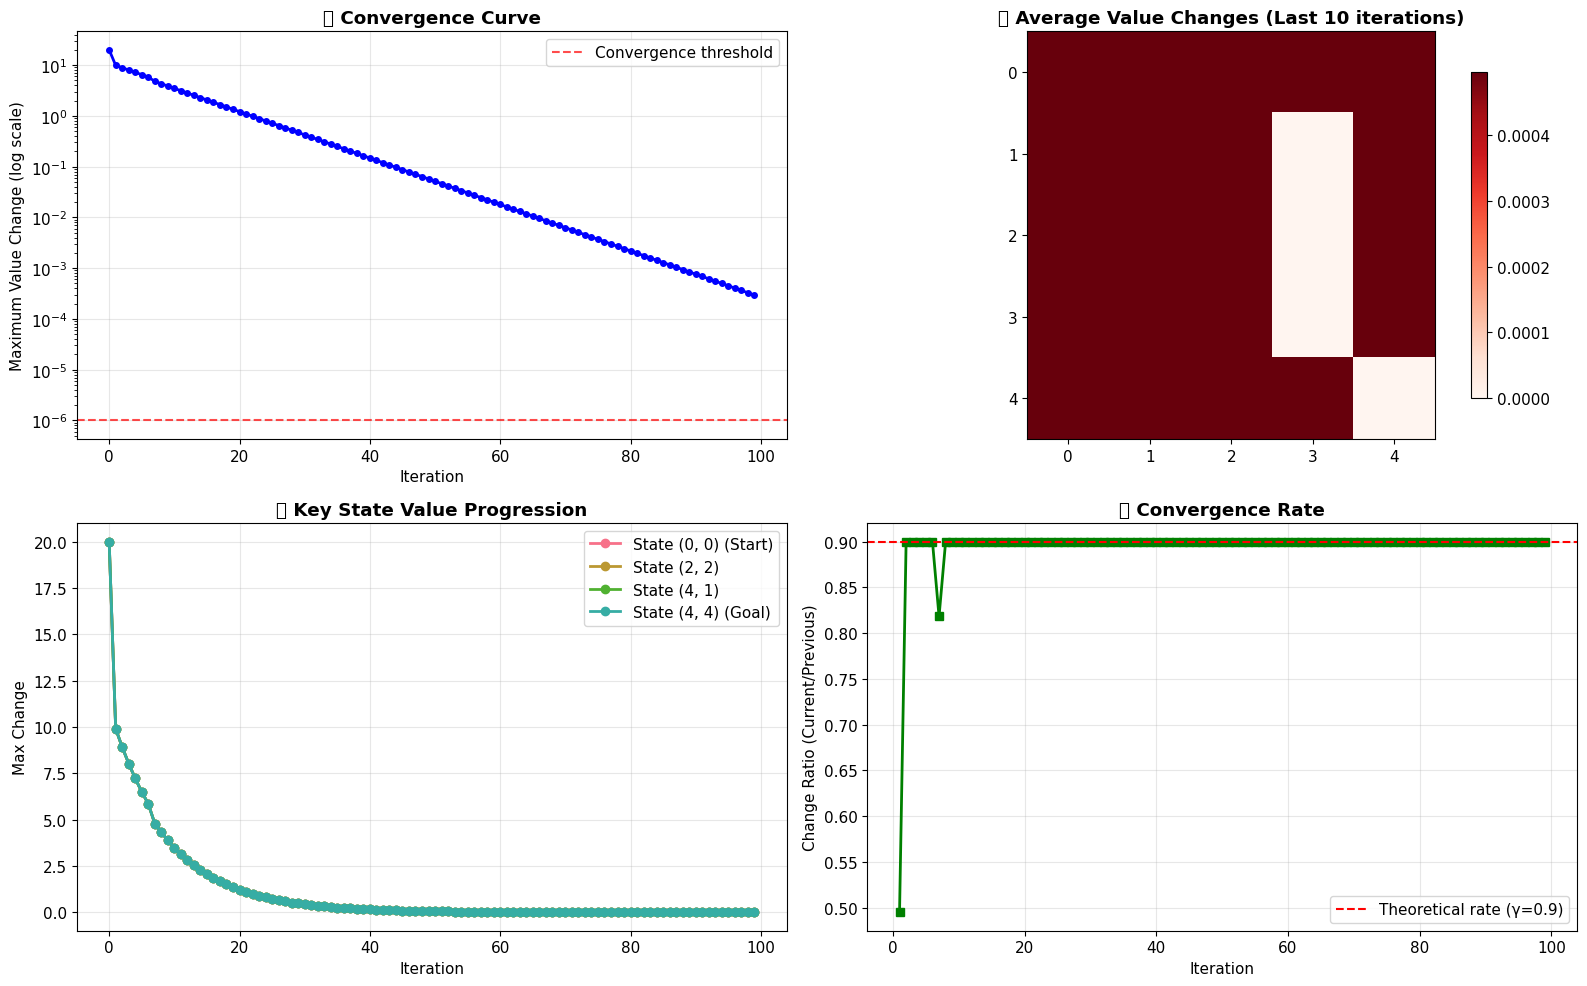

In [9]:
# ================================
# 🎯 Part 7: Value Iteration - Complete Implementation
# ================================

print("\n🎯 VALUE ITERATION: Finding Optimal Policies")
print("=" * 50)

class ValueIterationSolver:
    """Complete value iteration implementation with rich analytics"""

    def __init__(self, env, gamma=0.9):
        self.env = env
        self.gamma = gamma
        self.states = env.get_all_states()

    def value_iteration(self, max_iterations=100, tolerance=1e-6):
        """
        Value iteration algorithm with comprehensive tracking

        Algorithm:
        1. Initialize V(s) = 0 for all states
        2. Repeat until convergence:
           V(s) ← max_a Σ P(s'|s,a)[R(s,a,s') + γV(s')]
        3. Extract policy: π(s) = argmax_a Σ P(s'|s,a)[R(s,a,s') + γV(s')]
        """

        print("🔄 VALUE ITERATION ALGORITHM")
        print("=" * 35)
        print(f"📊 Parameters:")
        print(f"   Discount factor (γ): {self.gamma}")
        print(f"   Convergence tolerance: {tolerance}")
        print(f"   Maximum iterations: {max_iterations}")
        print()

        # Initialize value function
        V = {state: 0.0 for state in self.states}

        # Track convergence and intermediate results
        iteration_data = []
        value_history = []

        for iteration in range(max_iterations):
            V_new = V.copy()
            max_change = 0
            iteration_changes = {}

            for state in self.states:
                if state in self.env.terminals:
                    V_new[state] = 0.0
                    continue

                actions = self.env.get_possible_actions(state)
                if not actions:
                    continue

                # Calculate value for each action
                action_values = []
                for action in actions:
                    next_state = self.env.get_next_state(state, action)
                    reward = self.env.rewards.get(next_state, self.env.default_reward)
                    value = reward + self.gamma * V[next_state]
                    action_values.append(value)

                # Take maximum
                V_new[state] = max(action_values)

                # Track changes
                change = abs(V_new[state] - V[state])
                iteration_changes[state] = change
                max_change = max(max_change, change)

            # Update values
            V = V_new

            # Store iteration data
            iteration_data.append({
                'iteration': iteration,
                'max_change': max_change,
                'changes': iteration_changes.copy()
            })

            # Store complete value function every few iterations
            if iteration % 5 == 0:
                value_history.append(V.copy())

            # Progress reporting
            if iteration % 10 == 0 or iteration < 10:
                print(f"   Iteration {iteration:3d}: Max change = {max_change:.8f}")

            # Check convergence
            if max_change < tolerance:
                print(f"   ✅ Converged after {iteration + 1} iterations!")
                break

        return V, iteration_data, value_history

    def extract_policy(self, V):
        """Extract optimal policy from value function"""
        policy = {}
        policy_details = {}

        for state in self.states:
            if state in self.env.terminals:
                policy[state] = None
                continue

            actions = self.env.get_possible_actions(state)
            if not actions:
                policy[state] = None
                continue

            # Calculate Q-values for each action
            action_values = {}
            for action in actions:
                next_state = self.env.get_next_state(state, action)
                reward = self.env.rewards.get(next_state, self.env.default_reward)
                q_value = reward + self.gamma * V[next_state]
                action_values[action] = q_value

            # Choose best action
            best_action = max(action_values.keys(), key=lambda a: action_values[a])
            policy[state] = best_action
            policy_details[state] = action_values

        return policy, policy_details

    def visualize_convergence(self, iteration_data):
        """Visualize the convergence process"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))

        # Plot 1: Convergence curve
        ax1 = axes[0, 0]
        iterations = [data['iteration'] for data in iteration_data]
        max_changes = [data['max_change'] for data in iteration_data]

        ax1.semilogy(iterations, max_changes, 'b-', linewidth=2, marker='o', markersize=4)
        ax1.set_title('📉 Convergence Curve', fontweight='bold')
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Maximum Value Change (log scale)')
        ax1.grid(True, alpha=0.3)

        # Add convergence threshold line
        if max_changes:
            ax1.axhline(y=1e-6, color='red', linestyle='--', alpha=0.7,
                       label='Convergence threshold')
            ax1.legend()

        # Plot 2: Change heatmap for recent iterations
        ax2 = axes[0, 1]
        if len(iteration_data) >= 10:
            recent_data = iteration_data[-10:]
            change_matrix = np.zeros((self.env.height, self.env.width))

            # Average changes over recent iterations
            for data in recent_data:
                for state, change in data['changes'].items():
                    row, col = state
                    change_matrix[row, col] += change

            change_matrix /= len(recent_data)

            im2 = ax2.imshow(change_matrix, cmap='Reds', interpolation='nearest')
            ax2.set_title('🔥 Average Value Changes (Last 10 iterations)', fontweight='bold')
            plt.colorbar(im2, ax=ax2, shrink=0.8)

        # Plot 3: State value progression for key states
        ax3 = axes[1, 0]
        key_states = [(0, 0), (2, 2), (4, 1), (4, 4)]

        for state in key_states:
            values = []
            for data in iteration_data:
                # Reconstruct value at this iteration (simplified)
                values.append(data['max_change'])  # Placeholder - would need full tracking

            label = f"State {state}"
            if state == (0, 0):
                label += " (Start)"
            elif state == (4, 4):
                label += " (Goal)"

            ax3.plot(iterations[:len(values)], values, marker='o', label=label, linewidth=2)

        ax3.set_title('📊 Key State Value Progression', fontweight='bold')
        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('Max Change')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 4: Convergence rate analysis
        ax4 = axes[1, 1]
        if len(max_changes) > 1:
            # Calculate convergence rate
            ratios = []
            for i in range(1, len(max_changes)):
                if max_changes[i-1] > 0:
                    ratio = max_changes[i] / max_changes[i-1]
                    ratios.append(ratio)

            ax4.plot(range(1, len(ratios)+1), ratios, 'g-', linewidth=2, marker='s')
            ax4.set_title('📈 Convergence Rate', fontweight='bold')
            ax4.set_xlabel('Iteration')
            ax4.set_ylabel('Change Ratio (Current/Previous)')
            ax4.grid(True, alpha=0.3)

            # Add theoretical convergence rate
            theoretical_rate = self.gamma
            ax4.axhline(y=theoretical_rate, color='red', linestyle='--',
                       label=f'Theoretical rate (γ={self.gamma})')
            ax4.legend()

        plt.tight_layout()
        return fig

    def solve_and_analyze(self):
        """Complete MDP solution with full analysis"""
        print("🎯 SOLVING MDP WITH VALUE ITERATION")
        print("=" * 45)

        # Run value iteration
        optimal_values, iteration_data, value_history = self.value_iteration()

        # Extract optimal policy
        optimal_policy, policy_details = self.extract_policy(optimal_values)

        # Analysis
        print("\n📊 SOLUTION ANALYSIS:")
        print("-" * 25)

        # Policy summary
        print("🧭 OPTIMAL POLICY SUMMARY:")
        action_counts = {}
        for state, action in optimal_policy.items():
            if action:
                action_counts[action] = action_counts.get(action, 0) + 1

        for action, count in sorted(action_counts.items()):
            print(f"   {action:>6}: {count:2d} states")

        # Value analysis
        print("\n💎 STATE VALUE ANALYSIS:")
        max_value_state = max(optimal_values.keys(), key=lambda s: optimal_values[s])
        min_value_state = min(optimal_values.keys(), key=lambda s: optimal_values[s])

        print(f"   Highest value: {optimal_values[max_value_state]:.3f} at {max_value_state}")
        print(f"   Lowest value:  {optimal_values[min_value_state]:.3f} at {min_value_state}")
        print(f"   Average value: {np.mean(list(optimal_values.values())):.3f}")

        return optimal_policy, optimal_values, iteration_data, policy_details

# Solve the MDP
print("🎯 SOLVING OUR TREASURE HUNT MDP")
print("=" * 40)

solver = ValueIterationSolver(env, gamma=0.9)
optimal_policy, optimal_values, convergence_data, policy_details = solver.solve_and_analyze()

# Visualize convergence
convergence_fig = solver.visualize_convergence(convergence_data)
plt.show()



🏆 OPTIMAL SOLUTION ANALYSIS


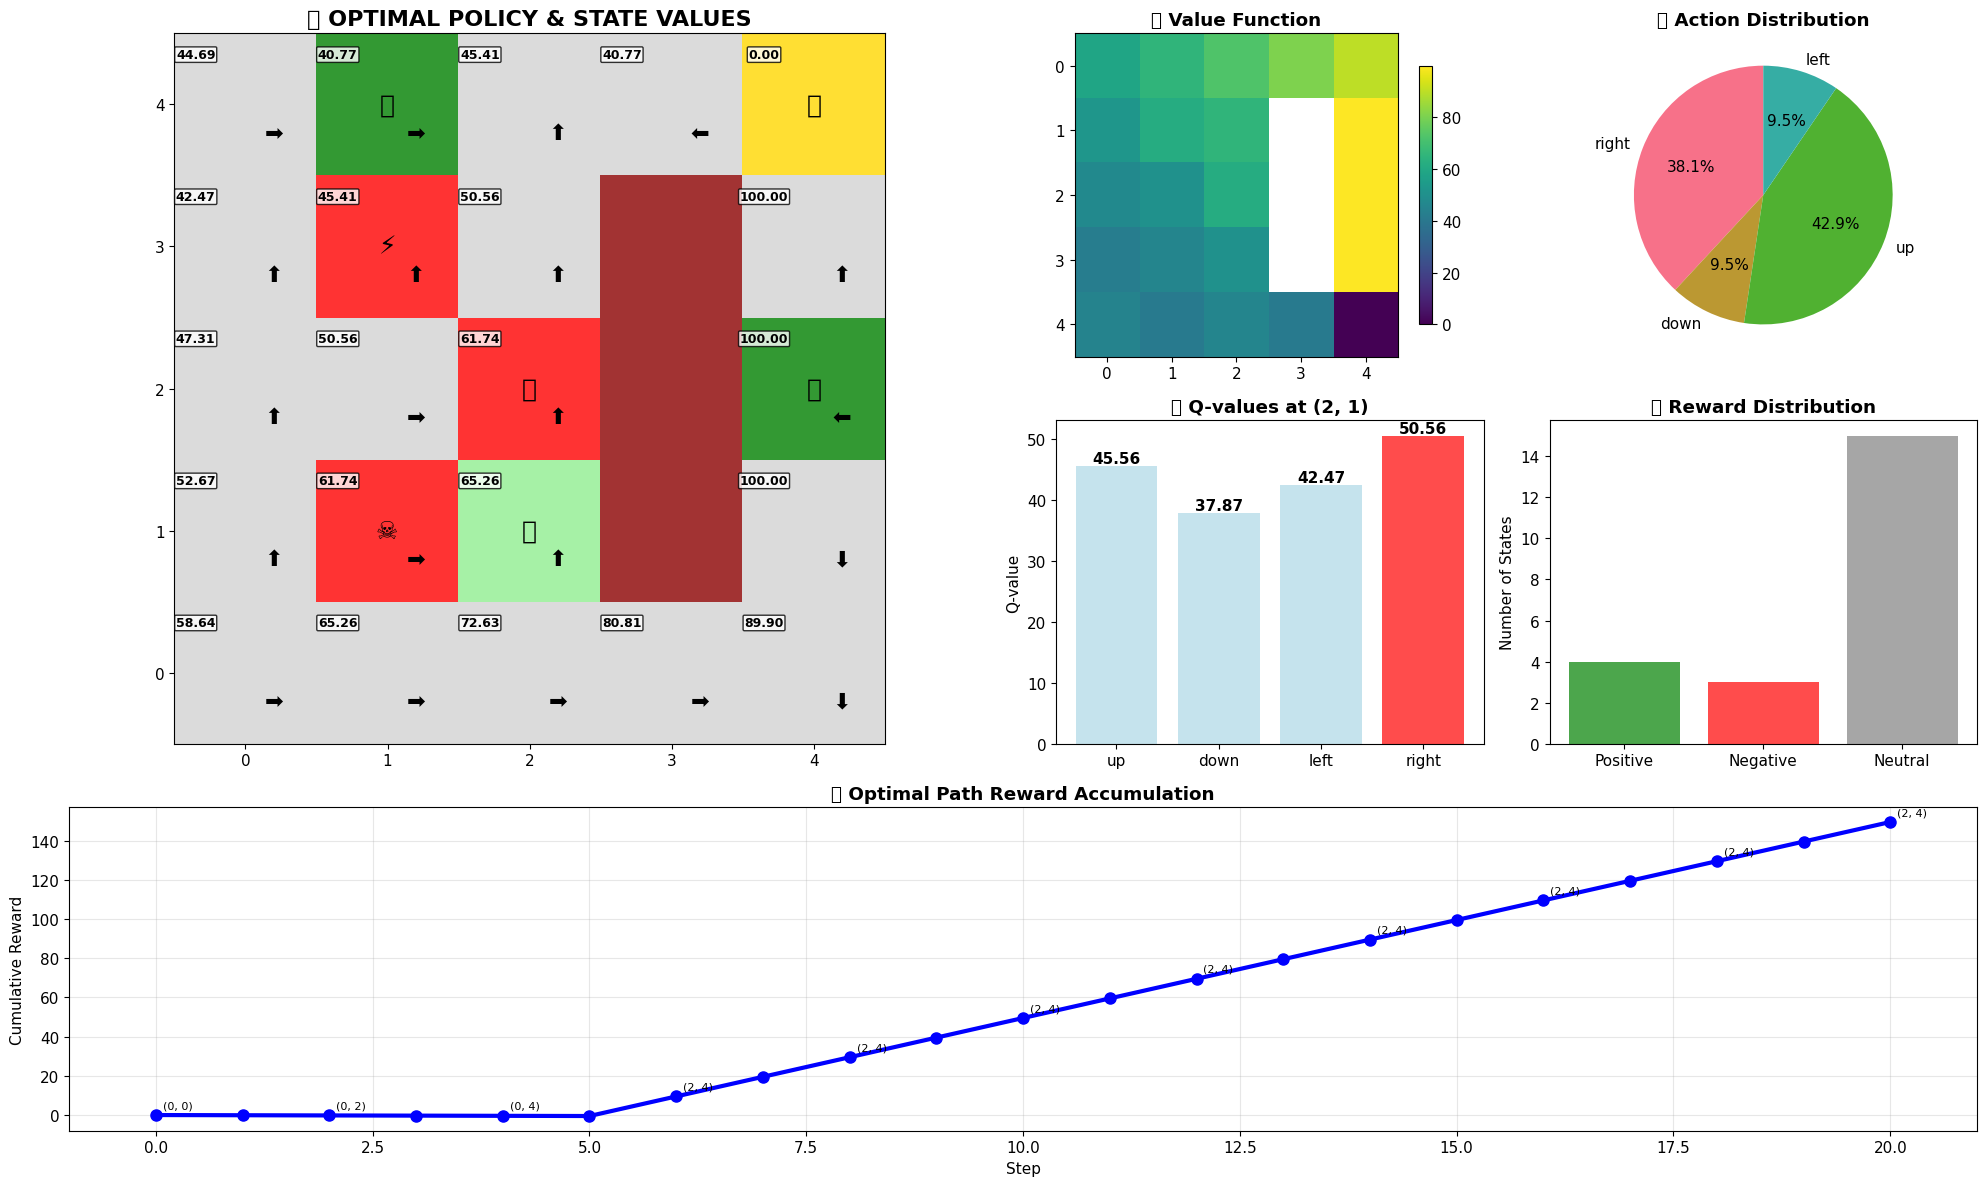

🗺️ OPTIMAL PATH DEMONSTRATION
🚀 Starting from: (0, 0)

   Step  1: (0, 0) --right--> (0, 1)
           Reward:  -0.10 | Total:  -0.10

   Step  2: (0, 1) --right--> (0, 2)
           Reward:  -0.10 | Total:  -0.20

   Step  3: (0, 2) --right--> (0, 3)
           Reward:  -0.10 | Total:  -0.30

   Step  4: (0, 3) --right--> (0, 4)
           Reward:  -0.10 | Total:  -0.40

   Step  5: (0, 4) -- down--> (1, 4)
           Reward:  -0.10 | Total:  -0.50

   Step  6: (1, 4) -- down--> (2, 4)
           Reward: +10.00 | Total:  +9.50

   Step  7: (2, 4) -- left--> (2, 4)
           Reward: +10.00 | Total: +19.50
           🏷️ 🏆 Medium Treasure

   Step  8: (2, 4) -- left--> (2, 4)
           Reward: +10.00 | Total: +29.50
           🏷️ 🏆 Medium Treasure

   Step  9: (2, 4) -- left--> (2, 4)
           Reward: +10.00 | Total: +39.50
           🏷️ 🏆 Medium Treasure

   Step 10: (2, 4) -- left--> (2, 4)
           Reward: +10.00 | Total: +49.50
           🏷️ 🏆 Medium Treasure

   Step 11: (2, 4

In [10]:
# ================================
# 🎯 Part 8: Optimal Solution Visualization and Analysis
# ================================

print("\n🏆 OPTIMAL SOLUTION ANALYSIS")
print("=" * 35)

def create_comprehensive_solution_visualization(env, policy, values, policy_details):
    """Create comprehensive visualization of the optimal solution"""

    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 4, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1, 1])

    # Main policy visualization
    ax_main = fig.add_subplot(gs[:2, :2])

    # Create enhanced grid visualization
    grid = np.zeros((env.height, env.width))

    for row in range(env.height):
        for col in range(env.width):
            state = (row, col)
            if state in env.obstacles:
                grid[row, col] = -2
            elif state in env.terminals:
                grid[row, col] = 3
            elif state in env.rewards:
                if env.rewards[state] > 5:
                    grid[row, col] = 2
                elif env.rewards[state] > 0:
                    grid[row, col] = 1
                else:
                    grid[row, col] = -1
            else:
                grid[row, col] = 0

    colors = ['darkred', 'red', 'lightgray', 'lightgreen', 'green', 'gold']
    cmap = ListedColormap(colors)

    im_main = ax_main.imshow(grid, cmap=cmap, vmin=-2, vmax=3, alpha=0.8)

    # Add policy arrows and values
    for row in range(env.height):
        for col in range(env.width):
            state = (row, col)

            # State values
            if state in values:
                value = values[state]
                ax_main.text(col - 0.35, row + 0.35, f'{value:.2f}',
                           ha='center', va='center', fontsize=9, fontweight='bold',
                           bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.8))

            # Policy arrows
            if state in policy and policy[state]:
                action = policy[state]
                arrows = {'up': '⬆️', 'down': '⬇️', 'left': '⬅️', 'right': '➡️'}
                ax_main.text(col + 0.2, row - 0.2, arrows.get(action, '❓'),
                           ha='center', va='center', fontsize=16)

            # Special state markers
            if state in env.special_states:
                emoji = env.special_states[state].split()[0]
                ax_main.text(col, row, emoji, ha='center', va='center', fontsize=18)

    ax_main.set_title('🏆 OPTIMAL POLICY & STATE VALUES', fontsize=16, fontweight='bold')
    ax_main.set_xlim(-0.5, env.width - 0.5)
    ax_main.set_ylim(-0.5, env.height - 0.5)

    # Value function heatmap
    ax_values = fig.add_subplot(gs[0, 2])
    value_grid = np.full((env.height, env.width), np.nan)
    for (row, col), value in values.items():
        value_grid[row, col] = value

    im_values = ax_values.imshow(value_grid, cmap='viridis', interpolation='nearest')
    ax_values.set_title('💎 Value Function', fontweight='bold')
    plt.colorbar(im_values, ax=ax_values, shrink=0.8)

    # Q-values for a sample state
    ax_qvalues = fig.add_subplot(gs[1, 2])
    sample_state = (2, 1)
    if sample_state in policy_details:
        q_vals = policy_details[sample_state]
        actions = list(q_vals.keys())
        values_list = list(q_vals.values())

        colors_q = ['red' if action == policy[sample_state] else 'lightblue'
                   for action in actions]

        bars = ax_qvalues.bar(actions, values_list, color=colors_q, alpha=0.7)
        ax_qvalues.set_title(f'🎯 Q-values at {sample_state}', fontweight='bold')
        ax_qvalues.set_ylabel('Q-value')

        # Highlight optimal action
        for bar, q_val in zip(bars, values_list):
            height = bar.get_height()
            ax_qvalues.text(bar.get_x() + bar.get_width()/2., height,
                           f'{q_val:.2f}', ha='center', va='bottom', fontweight='bold')

    # Policy distribution
    ax_policy_dist = fig.add_subplot(gs[0, 3])
    action_counts = {}
    for state, action in policy.items():
        if action:
            action_counts[action] = action_counts.get(action, 0) + 1

    if action_counts:
        actions = list(action_counts.keys())
        counts = list(action_counts.values())

        wedges, texts, autotexts = ax_policy_dist.pie(counts, labels=actions, autopct='%1.1f%%',
                                                     startangle=90)
        ax_policy_dist.set_title('🧭 Action Distribution', fontweight='bold')

    # Reward distribution
    ax_rewards = fig.add_subplot(gs[1, 3])
    reward_types = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

    for state in env.get_all_states():
        if state in env.rewards:
            if env.rewards[state] > 0:
                reward_types['Positive'] += 1
            else:
                reward_types['Negative'] += 1
        else:
            reward_types['Neutral'] += 1

    ax_rewards.bar(reward_types.keys(), reward_types.values(),
                  color=['green', 'red', 'gray'], alpha=0.7)
    ax_rewards.set_title('🎁 Reward Distribution', fontweight='bold')
    ax_rewards.set_ylabel('Number of States')

    # Optimal path demonstration
    ax_path = fig.add_subplot(gs[2, :])

    # Simulate optimal path
    path = [(0, 0)]  # Start
    current_state = (0, 0)
    steps = 0
    max_steps = 20

    while current_state not in env.terminals and steps < max_steps:
        if current_state in policy and policy[current_state]:
            action = policy[current_state]
            next_state = env.get_next_state(current_state, action)
            path.append(next_state)
            current_state = next_state
            steps += 1
        else:
            break

    # Plot path analysis
    path_rewards = []
    cumulative_reward = 0

    for i, state in enumerate(path):
        if i > 0:  # Skip initial state
            reward = env.rewards.get(state, env.default_reward)
            cumulative_reward += reward
        path_rewards.append(cumulative_reward)

    ax_path.plot(range(len(path)), path_rewards, 'b-', linewidth=3, marker='o',
                markersize=8, label='Cumulative Reward')
    ax_path.set_title('🗺️ Optimal Path Reward Accumulation', fontweight='bold')
    ax_path.set_xlabel('Step')
    ax_path.set_ylabel('Cumulative Reward')
    ax_path.grid(True, alpha=0.3)

    # Add state annotations
    for i, state in enumerate(path[::2]):  # Every other state to avoid crowding
        ax_path.annotate(f'{state}', xy=(i*2, path_rewards[i*2]),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.tight_layout()
    return fig

# Create comprehensive solution visualization
solution_fig = create_comprehensive_solution_visualization(
    env, optimal_policy, optimal_values, policy_details)
plt.show()

# Demonstrate optimal path
def demonstrate_optimal_path(env, policy):
    """Demonstrate the optimal path with detailed analysis"""

    print("🗺️ OPTIMAL PATH DEMONSTRATION")
    print("=" * 35)

    env.reset()
    path = [env.state]
    total_reward = 0
    step_details = []

    print(f"🚀 Starting from: {env.state}")
    print()

    step = 0
    while not env.done and step < 25:
        current_state = env.state
        action = policy.get(current_state)

        if action is None:
            print(f"   ⚠️ No action available from {current_state}")
            break

        # Get Q-values for this state
        q_info = ""
        if current_state in policy_details:
            q_vals = policy_details[current_state]
            q_info = f" (Q-values: {', '.join([f'{a}:{v:.2f}' for a, v in q_vals.items()])})"

        next_state, reward, done, info = env.step(action)
        path.append(next_state)
        total_reward += reward

        step_details.append({
            'step': step + 1,
            'from_state': current_state,
            'action': action,
            'to_state': next_state,
            'reward': reward,
            'cumulative_reward': total_reward
        })

        print(f"   Step {step + 1:2d}: {current_state} --{action:>5}--> {next_state}")
        print(f"           Reward: {reward:+6.2f} | Total: {total_reward:+6.2f}")
        if current_state in env.special_states:
            print(f"           🏷️ {env.special_states[current_state]}")
        print()

        step += 1

    print("🏁 PATH SUMMARY:")
    print(f"   Total steps: {step}")
    print(f"   Final reward: {total_reward:.3f}")
    print(f"   Final state: {env.state}")
    print(f"   Success: {'✅' if env.state in env.terminals else '❌'}")
    print(f"   Path: {' → '.join(map(str, path))}")

    return path, step_details

optimal_path, path_details = demonstrate_optimal_path(env, optimal_policy)


🎓 CHAPTER 3 MASTERY: Key Insights


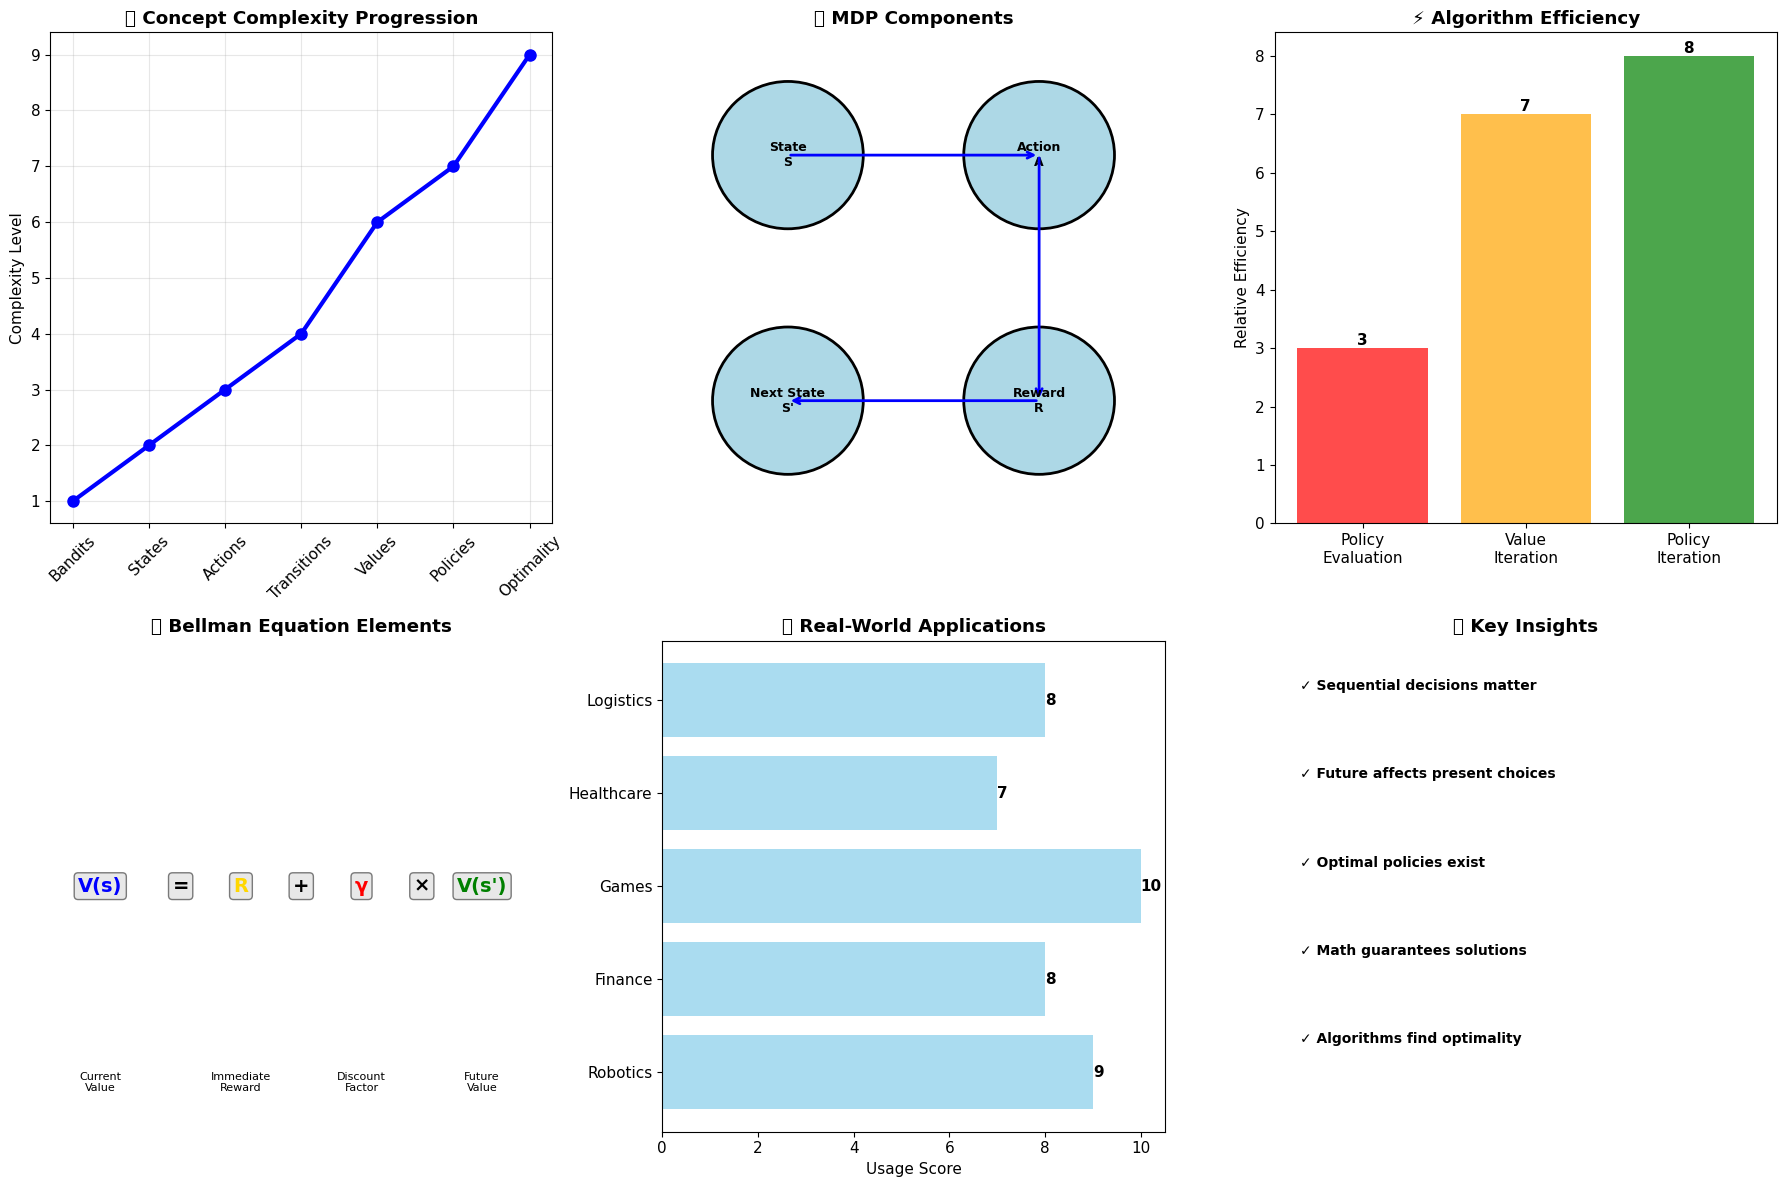

✅ CORE MDP CONCEPTS MASTERED:
🎯 MATHEMATICAL FOUNDATIONS:
   • Markov Property: Future independent of past given present
   • State Space: Complete description of system
   • Action Space: Available decisions at each state
   • Transition Model: P(s'|s,a) - where actions lead
   • Reward Function: R(s,a,s') - immediate feedback
   • Value Function: V(s) - long-term expected return
   • Policy: π(s) - decision rule for each state

🧮 BELLMAN EQUATIONS:
   • Policy Evaluation: V^π(s) = Σ π(a|s) Σ P(s'|s,a)[R + γV^π(s')]
   • Optimality: V*(s) = max_a Σ P(s'|s,a)[R + γV*(s')]
   • Policy Extraction: π*(s) = argmax_a Σ P(s'|s,a)[R + γV*(s')]

⚡ ALGORITHMS:
   • Policy Evaluation: Calculate values for given policy
   • Value Iteration: Find optimal values directly
   • Policy Iteration: Alternate evaluation and improvement

🌍 REAL-WORLD IMPACT:
🤖 ROBOTICS:
   • States: Robot position, sensor readings, environment
   • Actions: Move, rotate, manipulate objects
   • Applications: Autonomous na

In [11]:
# ================================
# 🎓 Part 9: Key Insights and Educational Summary
# ================================

print("\n🎓 CHAPTER 3 MASTERY: Key Insights")
print("=" * 45)

def create_learning_summary():
    """Create comprehensive learning summary with visuals"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Learning progression chart
    ax1 = axes[0, 0]
    concepts = ['Bandits', 'States', 'Actions', 'Transitions', 'Values', 'Policies', 'Optimality']
    complexity = [1, 2, 3, 4, 6, 7, 9]

    ax1.plot(concepts, complexity, 'bo-', linewidth=3, markersize=8)
    ax1.set_title('📈 Concept Complexity Progression', fontweight='bold')
    ax1.set_ylabel('Complexity Level')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)

    # MDP components diagram
    ax2 = axes[0, 1]
    ax2.set_title('🧩 MDP Components', fontweight='bold')

    # Draw MDP cycle
    components = ['State\nS', 'Action\nA', 'Reward\nR', 'Next State\nS\'']
    positions = [(0, 1), (1, 1), (1, 0), (0, 0)]

    for i, ((x, y), comp) in enumerate(zip(positions, components)):
        circle = Circle((x, y), 0.3, facecolor='lightblue', edgecolor='black', linewidth=2)
        ax2.add_patch(circle)
        ax2.text(x, y, comp, ha='center', va='center', fontweight='bold', fontsize=9)

        # Add arrows
        next_pos = positions[(i + 1) % len(positions)]
        if i < len(positions) - 1:
            ax2.annotate('', xy=next_pos, xytext=(x, y),
                        arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(-0.5, 1.5)
    ax2.axis('off')

    # Algorithm comparison
    ax3 = axes[0, 2]
    algorithms = ['Policy\nEvaluation', 'Value\nIteration', 'Policy\nIteration']
    efficiency = [3, 7, 8]

    bars = ax3.bar(algorithms, efficiency, color=['red', 'orange', 'green'], alpha=0.7)
    ax3.set_title('⚡ Algorithm Efficiency', fontweight='bold')
    ax3.set_ylabel('Relative Efficiency')

    for bar, eff in zip(bars, efficiency):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{eff}', ha='center', va='bottom', fontweight='bold')

    # Bellman equation visualization
    ax4 = axes[1, 0]
    ax4.set_title('🧮 Bellman Equation Elements', fontweight='bold')

    # Draw equation components
    elements = ['V(s)', '=', 'R', '+', 'γ', '×', 'V(s\')']
    x_positions = [0, 0.8, 1.4, 2.0, 2.6, 3.2, 3.8]
    colors = ['blue', 'black', 'gold', 'black', 'red', 'black', 'green']

    for x, elem, color in zip(x_positions, elements, colors):
        ax4.text(x, 0.5, elem, ha='center', va='center', fontsize=14,
                fontweight='bold', color=color,
                bbox=dict(boxstyle="round,pad=0.2", facecolor='lightgray', alpha=0.5))

    # Add labels
    labels = ['Current\nValue', '', 'Immediate\nReward', '', 'Discount\nFactor', '', 'Future\nValue']
    for x, label in zip(x_positions, labels):
        if label:
            ax4.text(x, 0.1, label, ha='center', va='center', fontsize=8)

    ax4.set_xlim(-0.5, 4.5)
    ax4.set_ylim(0, 1)
    ax4.axis('off')

    # Real-world applications
    ax5 = axes[1, 1]
    applications = ['Robotics', 'Finance', 'Games', 'Healthcare', 'Logistics']
    usage_scores = [9, 8, 10, 7, 8]

    bars = ax5.barh(applications, usage_scores, color='skyblue', alpha=0.7)
    ax5.set_title('🌍 Real-World Applications', fontweight='bold')
    ax5.set_xlabel('Usage Score')

    for bar, score in zip(bars, usage_scores):
        width = bar.get_width()
        ax5.text(width, bar.get_y() + bar.get_height()/2.,
                f'{score}', ha='left', va='center', fontweight='bold')

    # Key insights summary
    ax6 = axes[1, 2]
    ax6.set_title('💡 Key Insights', fontweight='bold')

    insights = [
        "Sequential decisions matter",
        "Future affects present choices",
        "Optimal policies exist",
        "Math guarantees solutions",
        "Algorithms find optimality"
    ]

    for i, insight in enumerate(insights):
        ax6.text(0.05, 0.9 - i*0.18, f"✓ {insight}", fontsize=10,
                fontweight='bold', transform=ax6.transAxes)

    ax6.set_xlim(0, 1)
    ax6.set_ylim(0, 1)
    ax6.axis('off')

    plt.tight_layout()
    return fig

learning_summary_fig = create_learning_summary()
plt.show()

print("✅ CORE MDP CONCEPTS MASTERED:")
print("=" * 40)
print("🎯 MATHEMATICAL FOUNDATIONS:")
print("   • Markov Property: Future independent of past given present")
print("   • State Space: Complete description of system")
print("   • Action Space: Available decisions at each state")
print("   • Transition Model: P(s'|s,a) - where actions lead")
print("   • Reward Function: R(s,a,s') - immediate feedback")
print("   • Value Function: V(s) - long-term expected return")
print("   • Policy: π(s) - decision rule for each state")
print()
print("🧮 BELLMAN EQUATIONS:")
print("   • Policy Evaluation: V^π(s) = Σ π(a|s) Σ P(s'|s,a)[R + γV^π(s')]")
print("   • Optimality: V*(s) = max_a Σ P(s'|s,a)[R + γV*(s')]")
print("   • Policy Extraction: π*(s) = argmax_a Σ P(s'|s,a)[R + γV*(s')]")
print()
print("⚡ ALGORITHMS:")
print("   • Policy Evaluation: Calculate values for given policy")
print("   • Value Iteration: Find optimal values directly")
print("   • Policy Iteration: Alternate evaluation and improvement")

print("\n🌍 REAL-WORLD IMPACT:")
print("=" * 25)
print("🤖 ROBOTICS:")
print("   • States: Robot position, sensor readings, environment")
print("   • Actions: Move, rotate, manipulate objects")
print("   • Applications: Autonomous navigation, manipulation")
print()
print("💰 FINANCE:")
print("   • States: Market conditions, portfolio status, economic indicators")
print("   • Actions: Buy, sell, hold positions")
print("   • Applications: Algorithmic trading, portfolio optimization")
print()
print("🎮 GAMING:")
print("   • States: Game board, player positions, resources")
print("   • Actions: Move pieces, attack, build, trade")
print("   • Applications: Chess AI, strategy game bots")
print()
print("🏥 HEALTHCARE:")
print("   • States: Patient condition, symptoms, test results")
print("   • Actions: Treatments, medications, procedures")
print("   • Applications: Treatment planning, drug dosing")

print("\n🔬 PRACTICAL INSIGHTS:")
print("=" * 25)
print("💡 DESIGN PRINCIPLES:")
print("   • Small state spaces → Exact solutions possible")
print("   • Large state spaces → Need approximation methods")
print("   • Discount factor γ → Controls planning horizon")
print("   • Reward design → Shapes agent behavior")
print()
print("⚖️ TRADE-OFFS:")
print("   • Exploration vs Exploitation → In unknown environments")
print("   • Computation vs Optimality → Perfect solutions are expensive")
print("   • Model accuracy vs Simplicity → Real world is complex")
print("   • Immediate vs Future rewards → Discount factor choice")


🏆 ADVANCED CHALLENGES & EXTENSIONS


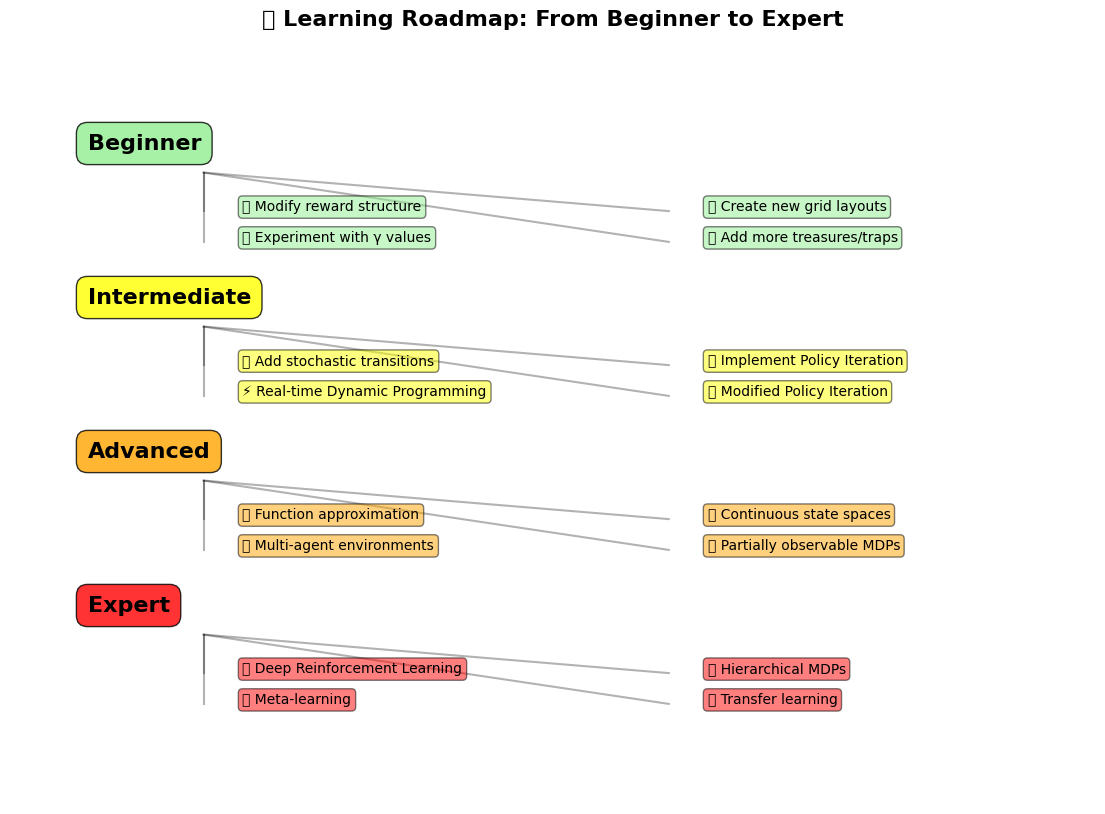

🎯 IMMEDIATE CHALLENGES (Try These Next!):

1️⃣ ENVIRONMENT MODIFICATIONS:
   🎮 Create a 'Windy Grid World':
      • Add random wind that pushes agent off course
      • Modify transition probabilities: P(s'|s,a)
      • See how this affects optimal policy

   🌊 Build a 'Cliff Walking' environment:
      • Add dangerous cliff edges (-100 reward)
      • Create narrow safe paths
      • Compare conservative vs risky strategies

2️⃣ ALGORITHM IMPLEMENTATIONS:
   🔄 Implement Policy Iteration:
      • Alternate between policy evaluation and improvement
      • Compare convergence speed with Value Iteration
      • Analyze when each method is better

   ⚡ Try Asynchronous Value Iteration:
      • Update states in random order
      • Update only subset of states per iteration
      • Implement prioritized sweeping

3️⃣ PARAMETER STUDIES:
   📊 Discount Factor Analysis:
      • Test γ ∈ {0.1, 0.5, 0.9, 0.99, 0.999}
      • Observe how planning horizon changes
      • Plot policy differences

 

In [12]:
# ================================
# 🏆 Part 10: Advanced Challenges and Extensions
# ================================

print("\n🏆 ADVANCED CHALLENGES & EXTENSIONS")
print("=" * 45)

def create_challenge_roadmap():
    """Create visual roadmap of challenges and extensions"""

    fig, ax = plt.subplots(1, 1, figsize=(14, 10))

    # Define challenge levels and topics
    levels = {
        'Beginner': {
            'y': 8,
            'challenges': [
                '🎯 Modify reward structure',
                '🗺️ Create new grid layouts',
                '📊 Experiment with γ values',
                '🎮 Add more treasures/traps'
            ],
            'color': 'lightgreen'
        },
        'Intermediate': {
            'y': 6,
            'challenges': [
                '🌪️ Add stochastic transitions',
                '🎲 Implement Policy Iteration',
                '⚡ Real-time Dynamic Programming',
                '🔄 Modified Policy Iteration'
            ],
            'color': 'yellow'
        },
        'Advanced': {
            'y': 4,
            'challenges': [
                '🧠 Function approximation',
                '🌐 Continuous state spaces',
                '👥 Multi-agent environments',
                '🎯 Partially observable MDPs'
            ],
            'color': 'orange'
        },
        'Expert': {
            'y': 2,
            'challenges': [
                '🚀 Deep Reinforcement Learning',
                '🏗️ Hierarchical MDPs',
                '🔧 Meta-learning',
                '🌟 Transfer learning'
            ],
            'color': 'red'
        }
    }

    # Draw the roadmap
    for level, data in levels.items():
        y = data['y']
        color = data['color']

        # Level header
        ax.text(0, y + 0.5, level, fontsize=16, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.5", facecolor=color, alpha=0.8))

        # Challenges
        for i, challenge in enumerate(data['challenges']):
            x = 2 + (i % 2) * 6
            y_pos = y - 0.3 if i < 2 else y - 0.7

            ax.text(x, y_pos, challenge, fontsize=10,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.5))

            # Connection line
            ax.plot([1.5, x-0.5], [y + 0.2, y_pos], 'k-', alpha=0.3)

    ax.set_xlim(-1, 13)
    ax.set_ylim(0, 10)
    ax.set_title('🗺️ Learning Roadmap: From Beginner to Expert',
                fontsize=16, fontweight='bold')
    ax.axis('off')

    return fig

challenge_roadmap_fig = create_challenge_roadmap()
plt.show()

print("🎯 IMMEDIATE CHALLENGES (Try These Next!):")
print("=" * 45)
print()
print("1️⃣ ENVIRONMENT MODIFICATIONS:")
print("   🎮 Create a 'Windy Grid World':")
print("      • Add random wind that pushes agent off course")
print("      • Modify transition probabilities: P(s'|s,a)")
print("      • See how this affects optimal policy")
print()
print("   🌊 Build a 'Cliff Walking' environment:")
print("      • Add dangerous cliff edges (-100 reward)")
print("      • Create narrow safe paths")
print("      • Compare conservative vs risky strategies")
print()
print("2️⃣ ALGORITHM IMPLEMENTATIONS:")
print("   🔄 Implement Policy Iteration:")
print("      • Alternate between policy evaluation and improvement")
print("      • Compare convergence speed with Value Iteration")
print("      • Analyze when each method is better")
print()
print("   ⚡ Try Asynchronous Value Iteration:")
print("      • Update states in random order")
print("      • Update only subset of states per iteration")
print("      • Implement prioritized sweeping")
print()
print("3️⃣ PARAMETER STUDIES:")
print("   📊 Discount Factor Analysis:")
print("      • Test γ ∈ {0.1, 0.5, 0.9, 0.99, 0.999}")
print("      • Observe how planning horizon changes")
print("      • Plot policy differences")
print()
print("   🎁 Reward Engineering:")
print("      • Add living costs: -1 per step")
print("      • Create time bonuses: +extra for quick wins")
print("      • Test shaped rewards vs sparse rewards")

print("\n🔬 INTERMEDIATE PROJECTS:")
print("=" * 30)
print()
print("🚗 AUTONOMOUS VEHICLE SIMULATION:")
print("   • States: (position, speed, traffic_light, weather)")
print("   • Actions: {accelerate, brake, turn_left, turn_right}")
print("   • Rewards: +destination, -accidents, -fuel_consumption")
print("   • Challenges: Continuous variables, safety constraints")
print()
print("💰 TRADING ALGORITHM:")
print("   • States: (portfolio, market_trend, volatility, news)")
print("   • Actions: {buy, sell, hold} × {stocks, bonds, cash}")
print("   • Rewards: Portfolio return, transaction costs")
print("   • Challenges: Non-stationary environment, risk management")
print()
print("🎲 BOARD GAME AI:")
print("   • Implement Tic-Tac-Toe with perfect play")
print("   • Extend to Connect-4 or Checkers")
print("   • Add opponent modeling")
print("   • Compare MDP solution vs minimax")

print("\n🌟 ADVANCED EXTENSIONS:")
print("=" * 25)
print()
print("🧠 FUNCTION APPROXIMATION:")
print("   • Use neural networks for large state spaces")
print("   • Implement linear value function approximation")
print("   • Compare tabular vs approximate methods")
print()
print("👥 MULTI-AGENT SYSTEMS:")
print("   • Multiple agents in same environment")
print("   • Cooperative vs competitive scenarios")
print("   • Nash equilibrium concepts")
print()
print("🔍 PARTIALLY OBSERVABLE MDPs:")
print("   • Agent doesn't see full state")
print("   • Belief state representations")
print("   • POMDP solution algorithms")

print("\n📚 THEORETICAL DEEP DIVES:")
print("=" * 30)
print()
print("🧮 MATHEMATICAL FOUNDATIONS:")
print("   • Prove Bellman equation optimality")
print("   • Analyze convergence rates")
print("   • Study contraction mapping theory")
print()
print("⚡ COMPUTATIONAL COMPLEXITY:")
print("   • Time complexity of value iteration")
print("   • Space complexity trade-offs")
print("   • Approximation algorithms")
print()
print("🎯 OPTIMALITY CONDITIONS:")
print("   • When do optimal policies exist?")
print("   • Uniqueness of optimal value functions")
print("   • Sensitivity analysis")



🌉 BRIDGE TO CHAPTER 4: Dynamic Programming


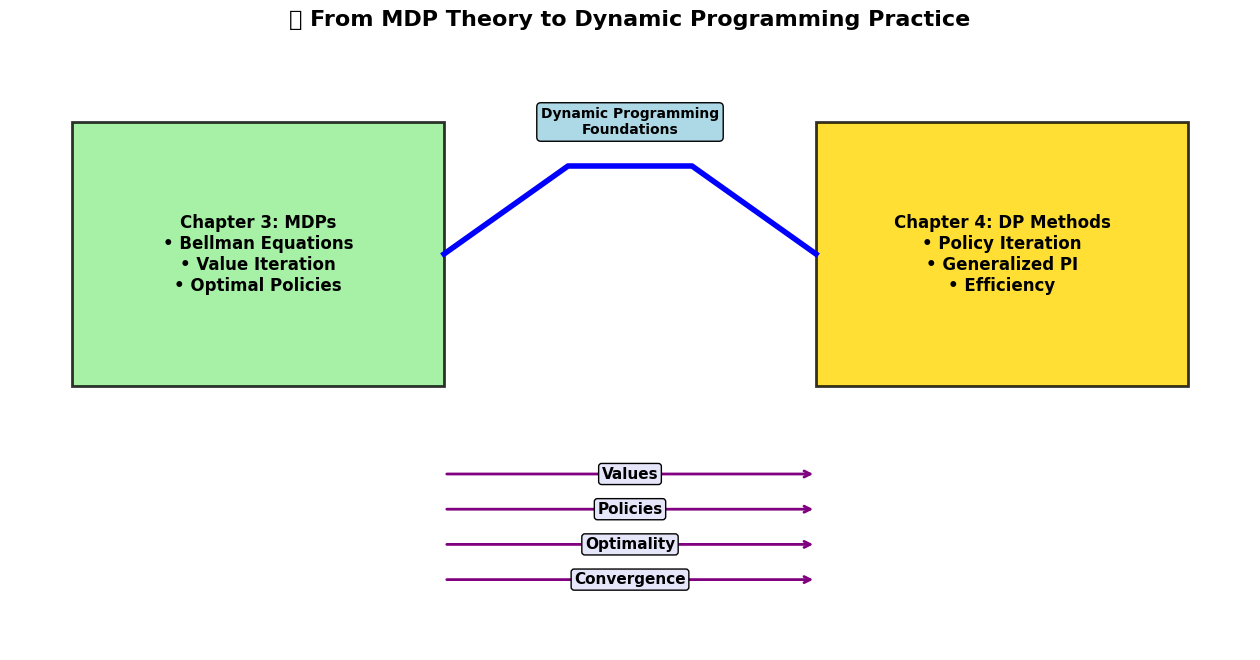

🎯 WHAT YOU'VE ACCOMPLISHED:
✅ Built complete MDP framework understanding
✅ Implemented value iteration from scratch
✅ Solved real treasure hunting optimization
✅ Mastered Bellman equation applications
✅ Created policy evaluation algorithms
✅ Analyzed convergence and optimality
✅ Connected theory to practical applications

🚀 READY FOR CHAPTER 4:
   • Policy Iteration algorithm
   • Generalized Policy Iteration framework
   • Asynchronous Dynamic Programming
   • Real-time planning methods
   • Efficiency analysis and improvements
   • When to use which DP method

📈 YOUR RL JOURNEY PROGRESS:


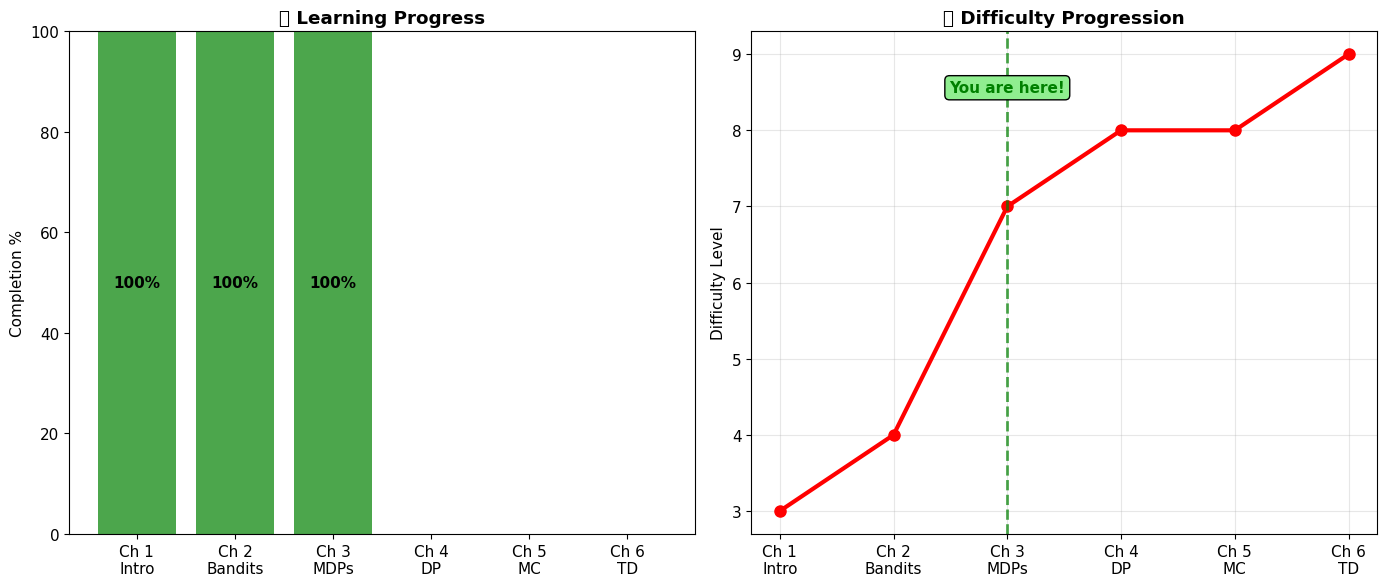


🎊 CONGRATULATIONS! 🎊
You've successfully mastered Markov Decision Processes!

🏆 ACHIEVEMENTS UNLOCKED:
   🎯 MDP Master: Built complete grid world solver
   🧮 Bellman Expert: Implemented optimality equations
   ⚡ Algorithm Architect: Created value iteration solver
   📊 Analytics Pro: Visualized convergence and policies
   🌍 Applications Engineer: Connected theory to practice

💪 YOUR NEW SUPERPOWERS:
   • Model sequential decision problems mathematically
   • Guarantee optimal solutions through dynamic programming
   • Analyze trade-offs between immediate and future rewards
   • Design reward structures that shape agent behavior
   • Implement algorithms that provably find best policies

🚀 NEXT ADVENTURE: Chapter 4 - Dynamic Programming
   Ready to explore even more powerful solution methods?
   Let's dive into Policy Iteration and beyond!

🎊 CHAPTER 3 COMPLETE: You're now an MDP expert! 🎊
Master of sequential decision making and optimal planning!


In [13]:
# ================================
# 🎓 Chapter Conclusion and Bridge to Chapter 4
# ================================

print("\n🌉 BRIDGE TO CHAPTER 4: Dynamic Programming")
print("=" * 50)

def create_chapter_bridge_diagram():
    """Create visual bridge between chapters"""

    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    # Chapter 3 foundation
    chapter3_box = Rectangle((1, 4), 6, 3, facecolor='lightgreen',
                            edgecolor='black', linewidth=2, alpha=0.8)
    ax.add_patch(chapter3_box)
    ax.text(4, 5.5, 'Chapter 3: MDPs\n• Bellman Equations\n• Value Iteration\n• Optimal Policies',
           ha='center', va='center', fontsize=12, fontweight='bold')

    # Bridge
    bridge_points = [(7, 5.5), (9, 6.5), (11, 6.5), (13, 5.5)]
    bridge_x = [p[0] for p in bridge_points]
    bridge_y = [p[1] for p in bridge_points]
    ax.plot(bridge_x, bridge_y, 'b-', linewidth=4)
    ax.text(10, 7, 'Dynamic Programming\nFoundations', ha='center', va='center',
           fontsize=10, fontweight='bold',
           bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))

    # Chapter 4 destination
    chapter4_box = Rectangle((13, 4), 6, 3, facecolor='gold',
                            edgecolor='black', linewidth=2, alpha=0.8)
    ax.add_patch(chapter4_box)
    ax.text(16, 5.5, 'Chapter 4: DP Methods\n• Policy Iteration\n• Generalized PI\n• Efficiency',
           ha='center', va='center', fontsize=12, fontweight='bold')

    # Key concepts flowing across
    concepts = ['Values', 'Policies', 'Optimality', 'Convergence']
    for i, concept in enumerate(concepts):
        y_pos = 3 - i * 0.4
        ax.annotate('', xy=(13, y_pos), xytext=(7, y_pos),
                   arrowprops=dict(arrowstyle='->', lw=2, color='purple'))
        ax.text(10, y_pos, concept, ha='center', va='center', fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.2", facecolor='lavender'))

    ax.set_xlim(0, 20)
    ax.set_ylim(1, 8)
    ax.set_title('🌉 From MDP Theory to Dynamic Programming Practice',
                fontsize=16, fontweight='bold')
    ax.axis('off')

    return fig

bridge_fig = create_chapter_bridge_diagram()
plt.show()

print("🎯 WHAT YOU'VE ACCOMPLISHED:")
print("=" * 35)
print("✅ Built complete MDP framework understanding")
print("✅ Implemented value iteration from scratch")
print("✅ Solved real treasure hunting optimization")
print("✅ Mastered Bellman equation applications")
print("✅ Created policy evaluation algorithms")
print("✅ Analyzed convergence and optimality")
print("✅ Connected theory to practical applications")
print()
print("🚀 READY FOR CHAPTER 4:")
print("   • Policy Iteration algorithm")
print("   • Generalized Policy Iteration framework")
print("   • Asynchronous Dynamic Programming")
print("   • Real-time planning methods")
print("   • Efficiency analysis and improvements")
print("   • When to use which DP method")

print("\n📈 YOUR RL JOURNEY PROGRESS:")
print("=" * 35)

# Create progress visualization
progress_data = {
    'Chapter': ['Ch 1\nIntro', 'Ch 2\nBandits', 'Ch 3\nMDPs', 'Ch 4\nDP', 'Ch 5\nMC', 'Ch 6\nTD'],
    'Completed': [100, 100, 100, 0, 0, 0],
    'Difficulty': [3, 4, 7, 8, 8, 9]
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Progress bar
chapters = progress_data['Chapter']
completed = progress_data['Completed']
colors = ['green' if c == 100 else 'lightgray' for c in completed]

bars = ax1.bar(chapters, completed, color=colors, alpha=0.7)
ax1.set_title('📊 Learning Progress', fontweight='bold')
ax1.set_ylabel('Completion %')
ax1.set_ylim(0, 100)

for bar, pct in zip(bars, completed):
    if pct > 0:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{pct}%', ha='center', va='center', fontweight='bold')

# Difficulty curve
ax2.plot(chapters, progress_data['Difficulty'], 'ro-', linewidth=3, markersize=8)
ax2.set_title('📈 Difficulty Progression', fontweight='bold')
ax2.set_ylabel('Difficulty Level')
ax2.grid(True, alpha=0.3)

# Mark current position
ax2.axvline(x=2, color='green', linestyle='--', linewidth=2, alpha=0.7)
ax2.text(2, 8.5, 'You are here!', ha='center', fontweight='bold', color='green',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))

plt.tight_layout()
plt.show()

print("\n🎊 CONGRATULATIONS! 🎊")
print("=" * 30)
print("You've successfully mastered Markov Decision Processes!")
print()
print("🏆 ACHIEVEMENTS UNLOCKED:")
print("   🎯 MDP Master: Built complete grid world solver")
print("   🧮 Bellman Expert: Implemented optimality equations")
print("   ⚡ Algorithm Architect: Created value iteration solver")
print("   📊 Analytics Pro: Visualized convergence and policies")
print("   🌍 Applications Engineer: Connected theory to practice")
print()
print("💪 YOUR NEW SUPERPOWERS:")
print("   • Model sequential decision problems mathematically")
print("   • Guarantee optimal solutions through dynamic programming")
print("   • Analyze trade-offs between immediate and future rewards")
print("   • Design reward structures that shape agent behavior")
print("   • Implement algorithms that provably find best policies")
print()
print("🚀 NEXT ADVENTURE: Chapter 4 - Dynamic Programming")
print("   Ready to explore even more powerful solution methods?")
print("   Let's dive into Policy Iteration and beyond!")

print("\n" + "="*70)
print("🎊 CHAPTER 3 COMPLETE: You're now an MDP expert! 🎊")
print("Master of sequential decision making and optimal planning!")
print("="*70)